In [50]:
!pip install prophet

In [51]:
import pandas as pd
from google.colab import drive
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import os

In [65]:
# Đường dẫn tới file trên Google Drive
train_file_path = '/content/drive/MyDrive/LuanVan/data/ComVN30_train.csv'
test_file_path = '/content/drive/MyDrive/LuanVan/data/ComVN30_test.csv'
# Đọc dữ liệu
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [66]:
class StockModelEvaluation:
    def __init__(self):
        self.results = []

    def fit_and_predict(self, model, train_df, test_df, ticker):
        # Huấn luyện mô hình với dữ liệu train
        model.fit(train_df)

        # Dự đoán với tập test
        future = test_df[['ds']]
        forecast = model.predict(future)

        # Điều chỉnh giá trị dự đoán
        last_train_value = train_df['y'].iloc[-1]
        first_forecast_value = forecast['yhat'].iloc[0]
        adjustment = last_train_value - first_forecast_value
        forecast['yhat_adjusted'] = forecast['yhat'] + adjustment
        forecast['yhat_upper_adjusted'] = forecast['yhat_upper'] + adjustment
        forecast['yhat_lower_adjusted'] = forecast['yhat_lower'] + adjustment

        # Tính toán MAE và RMSE
        y_true = test_df['y'].values
        y_pred = forecast['yhat_adjusted'].values

        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))

        print(f'Ticker: {ticker}, MAE: {mae}, RMSE: {rmse}')

        # Lưu kết quả
        self.results.append({
            'ticker': ticker,
            'mae': mae,
            'rmse': rmse,
            'seasonality_mode': model.seasonality_mode
        })

        # Trả về dự báo đã điều chỉnh và thang đo đánh giá
        return forecast

    def plot_forecast(self, train_df, forecast, test_df, ticker, seasonality_mode):
        # Xác định xu hướng dự đoán
        start_value = forecast['yhat_adjusted'].iloc[0]
        end_value = forecast['yhat_adjusted'].iloc[-1]
        trend = 'up' if end_value > start_value else 'down' if end_value < start_value else 'stable'

        # Tên file ảnh
        title = f'{seasonality_mode.capitalize()} Prophet_{ticker}: Trend {trend}'
        filename = title.replace(" ", "").replace(":", "_").replace(",", "") + '.png'
        file_path = os.path.join('/content/drive/MyDrive/LuanVan/results/FB_Prophet/', filename)

        # Vẽ biểu đồ
        plt.figure(figsize=(10, 6))
        plt.plot(train_df['ds'], train_df['y'], label='Train', color='blue')
        plt.plot(forecast['ds'], forecast['yhat_adjusted'], label='Prediction', color='orange')
        plt.fill_between(forecast['ds'], forecast['yhat_lower_adjusted'], forecast['yhat_upper_adjusted'], color='orange', alpha=0.2)
        plt.plot(test_df['ds'], test_df['y'], label='Test', color='green')
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

        # Lưu biểu đồ vào file
        plt.savefig(file_path)
        plt.close()

    def get_results(self, seasonality_mode):
        # Lọc kết quả theo seasonality_mode
        filtered_results = [result for result in self.results if result['seasonality_mode'] == seasonality_mode]
        results_df = pd.DataFrame(filtered_results)

        # Tính toán trung bình MAE và RMSE
        avg_mae = results_df['mae'].mean()
        avg_rmse = results_df['rmse'].mean()

        print(f'Average MAE ({seasonality_mode.capitalize()}): {avg_mae}, Average RMSE ({seasonality_mode.capitalize()}): {avg_rmse}')

        # Lưu kết quả vào tệp CSV
        csv_path = f'/content/drive/MyDrive/LuanVan/results/FB_Prophet/Prophet_results_{seasonality_mode}.csv'
        results_df.to_csv(csv_path, index=False)

        return results_df, avg_mae, avg_rmse


In [67]:
# Chuyển đổi cột 'time' sang định dạng datetime
train_df['time'] = pd.to_datetime(train_df['time'])
test_df['time'] = pd.to_datetime(test_df['time'])

# Tạo đối tượng StockModelEvaluation
evaluator_additive = StockModelEvaluation()
evaluator_multiplicative = StockModelEvaluation()

# Lấy danh sách các mã chứng khoán
tickers = train_df['ticker'].unique()

## Additive

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/845xvgvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/phj8b9hv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4805', 'data', 'file=/tmp/tmp5rkaockg/845xvgvc.json', 'init=/tmp/tmp5rkaockg/phj8b9hv.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modele00f5tm8/prophet_model-20240803151054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): SSI


15:10:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSI, MAE: 1531.8451256589003, RMSE: 1783.6224035813204


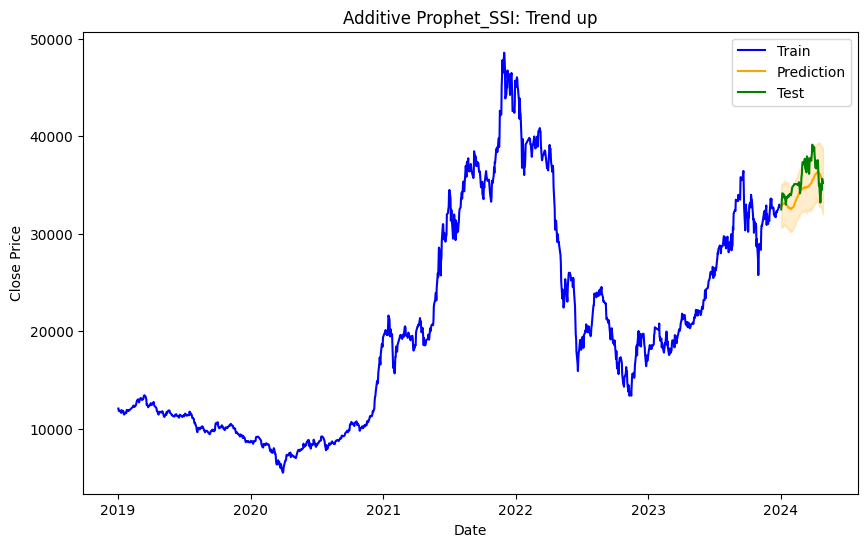

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/pvrcq3kv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/glwrc71m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93825', 'data', 'file=/tmp/tmp5rkaockg/pvrcq3kv.json', 'init=/tmp/tmp5rkaockg/glwrc71m.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelp75jqgmo/prophet_model-20240803151055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): BCM


15:10:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BCM, MAE: 3813.8174863873364, RMSE: 4323.64605177855


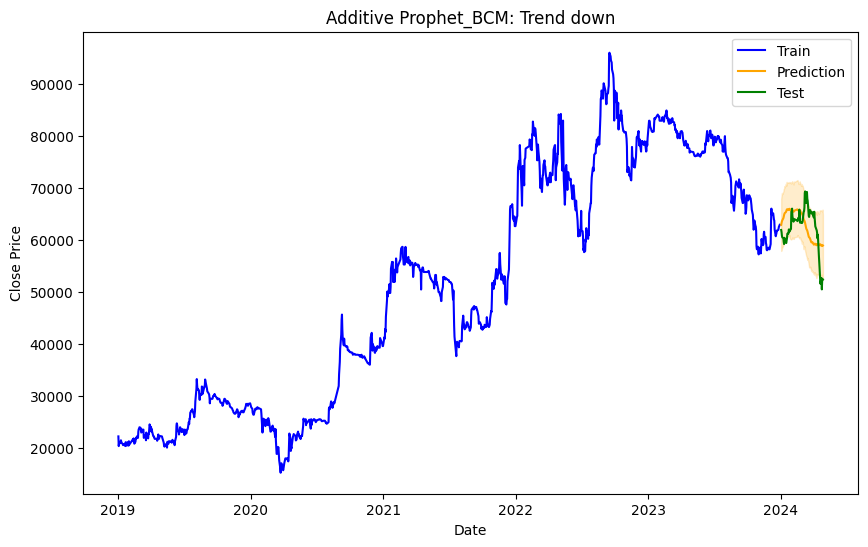

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/zkyje8d6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/d24_z0he.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31766', 'data', 'file=/tmp/tmp5rkaockg/zkyje8d6.json', 'init=/tmp/tmp5rkaockg/d24_z0he.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelqocpg7p4/prophet_model-20240803151056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VHM


15:10:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VHM, MAE: 1301.4909359537123, RMSE: 1651.3651611980774


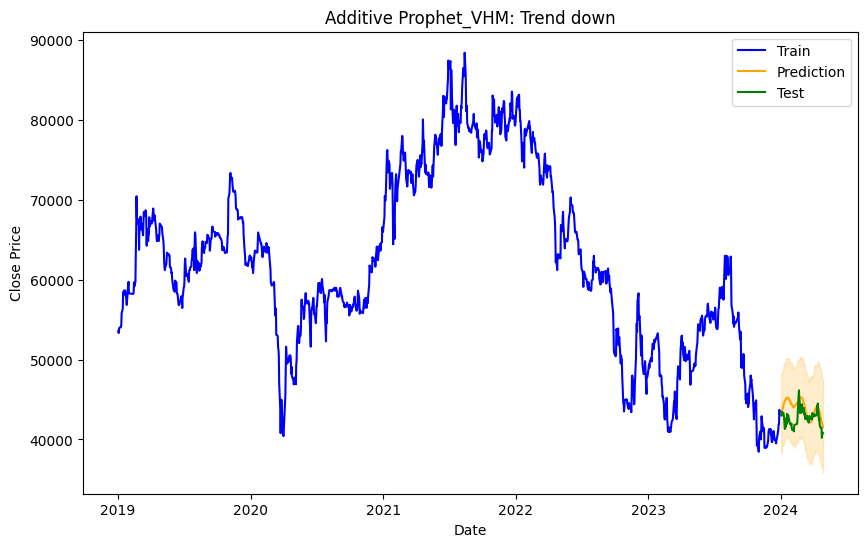

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/ao1dww97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/cdb8f4ld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96714', 'data', 'file=/tmp/tmp5rkaockg/ao1dww97.json', 'init=/tmp/tmp5rkaockg/cdb8f4ld.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelq2np5dit/prophet_model-20240803151057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VIC


15:10:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIC, MAE: 3834.416731517337, RMSE: 4917.436416740641


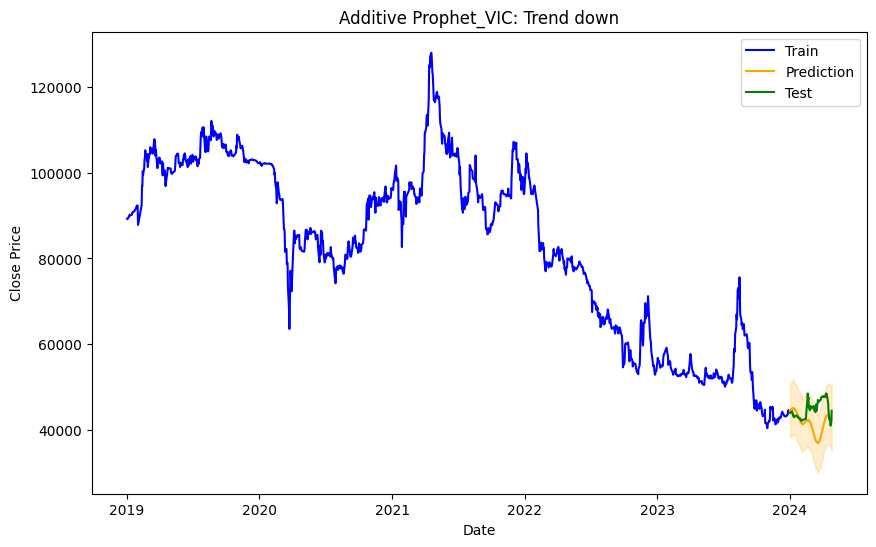

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/6x8zoewn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/n46fy3jp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40791', 'data', 'file=/tmp/tmp5rkaockg/6x8zoewn.json', 'init=/tmp/tmp5rkaockg/n46fy3jp.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelkdtq_ieb/prophet_model-20240803151058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VRE


15:10:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VRE, MAE: 1686.073083201903, RMSE: 1976.6741541988197


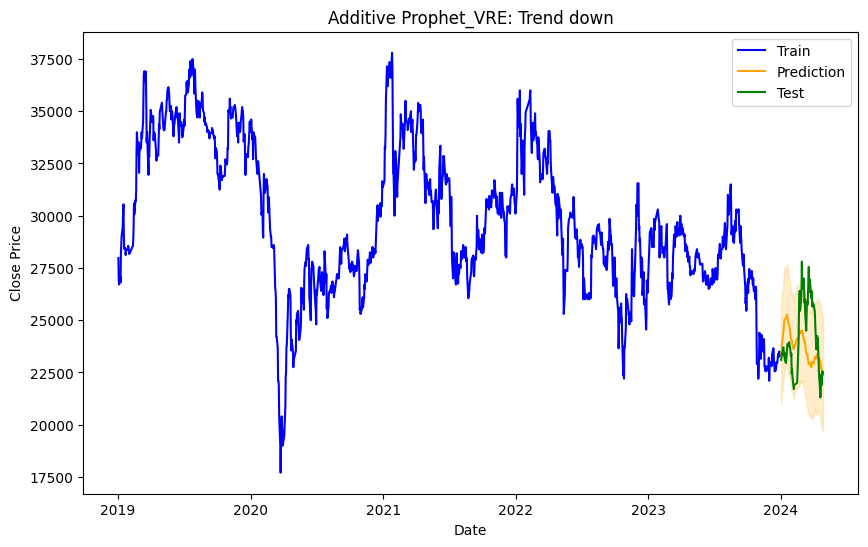

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/r7xiio8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/x46cuhnx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75601', 'data', 'file=/tmp/tmp5rkaockg/r7xiio8q.json', 'init=/tmp/tmp5rkaockg/x46cuhnx.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelrag37tdg/prophet_model-20240803151059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:10:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): BVH


15:11:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BVH, MAE: 3427.8112907597506, RMSE: 3956.365840813462


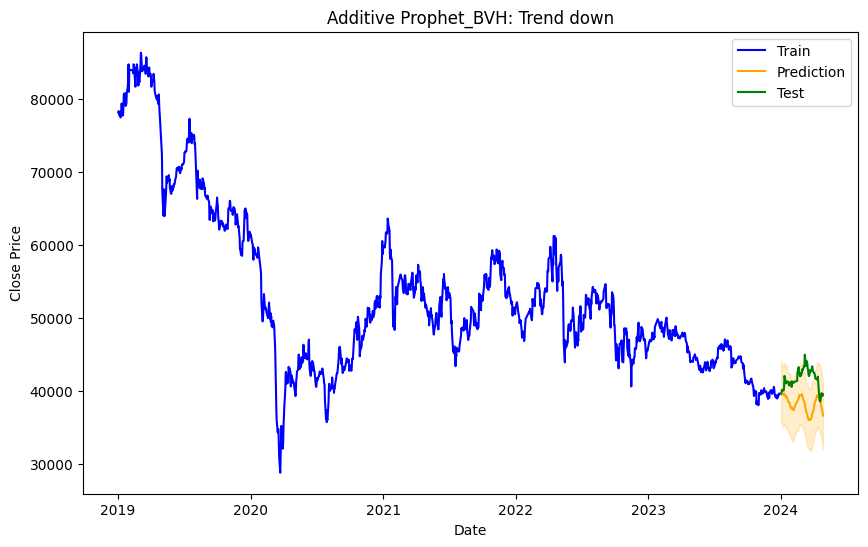

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/okeuzgwq.json


Processing ticker (Additive): POW


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/guq9jrfz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93731', 'data', 'file=/tmp/tmp5rkaockg/okeuzgwq.json', 'init=/tmp/tmp5rkaockg/guq9jrfz.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelkhwd1e3e/prophet_model-20240803151101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: POW, MAE: 189.9787596835998, RMSE: 244.23926833113342


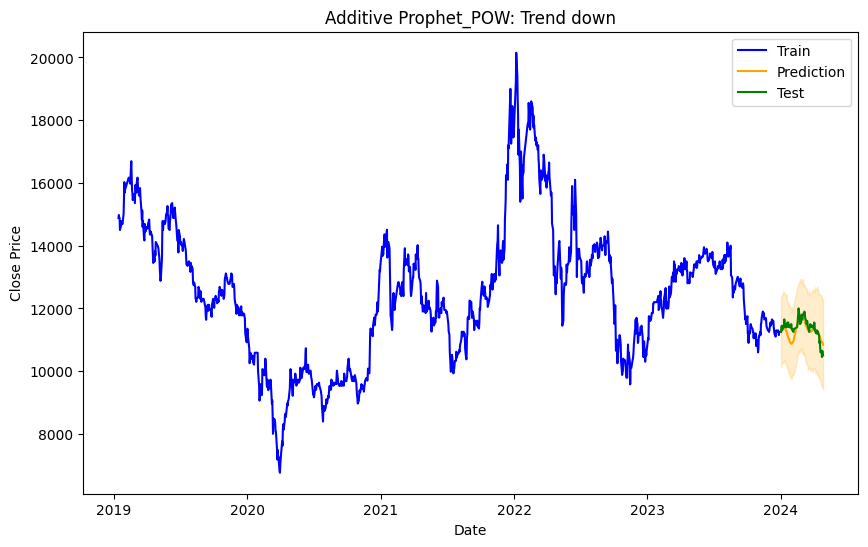

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/p1_hzwmn.json


Processing ticker (Additive): GAS


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/t_44_snj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15716', 'data', 'file=/tmp/tmp5rkaockg/p1_hzwmn.json', 'init=/tmp/tmp5rkaockg/t_44_snj.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelr8xpfz1u/prophet_model-20240803151102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GAS, MAE: 4600.381569619884, RMSE: 6024.802085883232


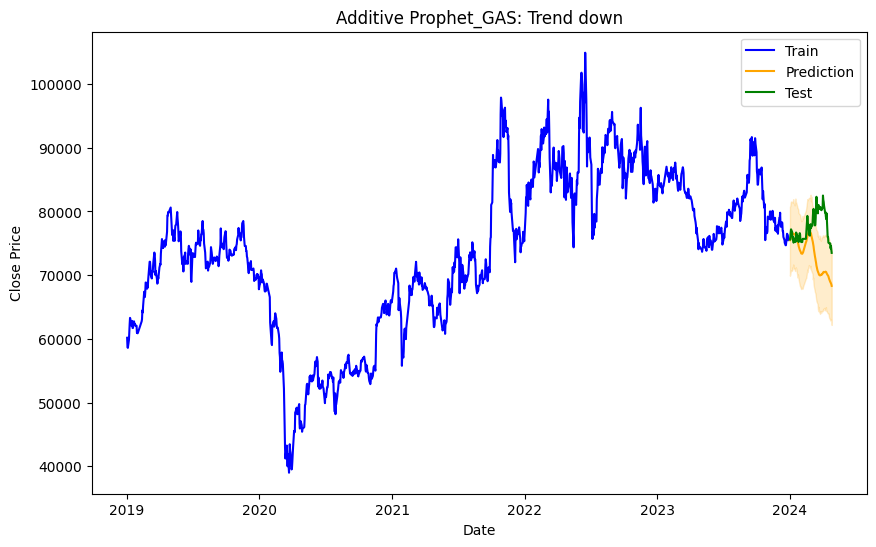

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/6wf19xve.json


Processing ticker (Additive): ACB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/w4ppz3mb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12942', 'data', 'file=/tmp/tmp5rkaockg/6wf19xve.json', 'init=/tmp/tmp5rkaockg/w4ppz3mb.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelb38nflgv/prophet_model-20240803151104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: ACB, MAE: 2142.0701439892464, RMSE: 2259.2600953402257


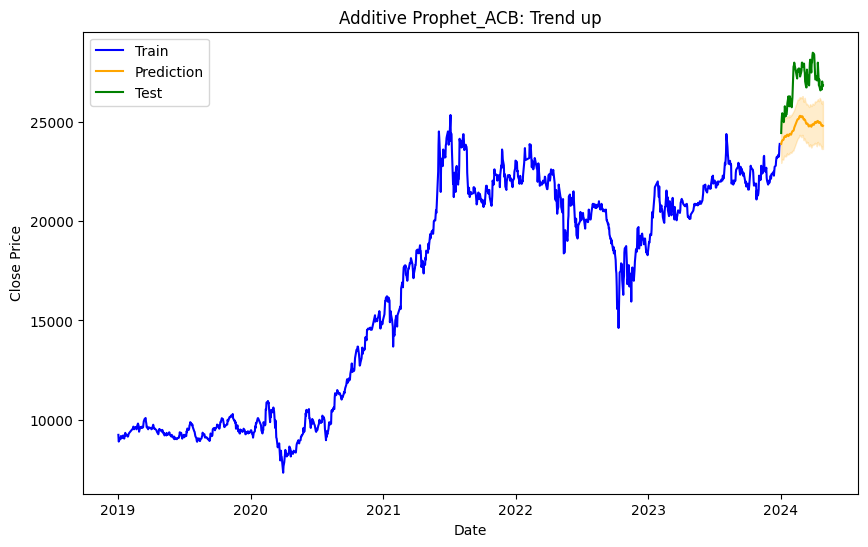

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/jll2d972.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/z58c8jg0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26120', 'data', 'file=/tmp/tmp5rkaockg/jll2d972.json', 'init=/tmp/tmp5rkaockg/z58c8jg0.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelzro0nouf/prophet_model-20240803151105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): BID


15:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BID, MAE: 4879.1262468496325, RMSE: 5675.9930394622


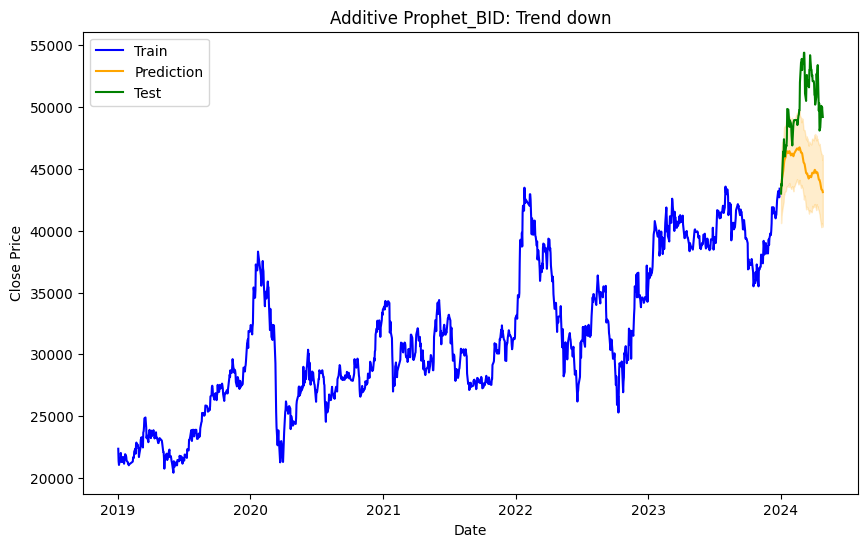

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/rczcpopa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/zpigqdwx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91073', 'data', 'file=/tmp/tmp5rkaockg/rczcpopa.json', 'init=/tmp/tmp5rkaockg/zpigqdwx.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelazppjk0r/prophet_model-20240803151106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): CTG


15:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: CTG, MAE: 5226.0901202911655, RMSE: 5538.126896295592


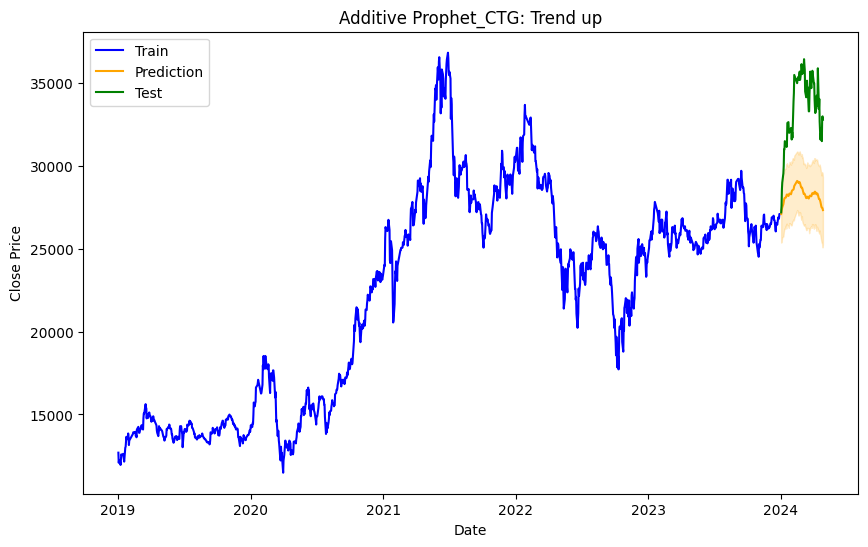

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/xm2x47jo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/txjolvk1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39107', 'data', 'file=/tmp/tmp5rkaockg/xm2x47jo.json', 'init=/tmp/tmp5rkaockg/txjolvk1.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model15rrnr9p/prophet_model-20240803151107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): HDB


15:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HDB, MAE: 1587.3013220330674, RMSE: 1850.210764809213


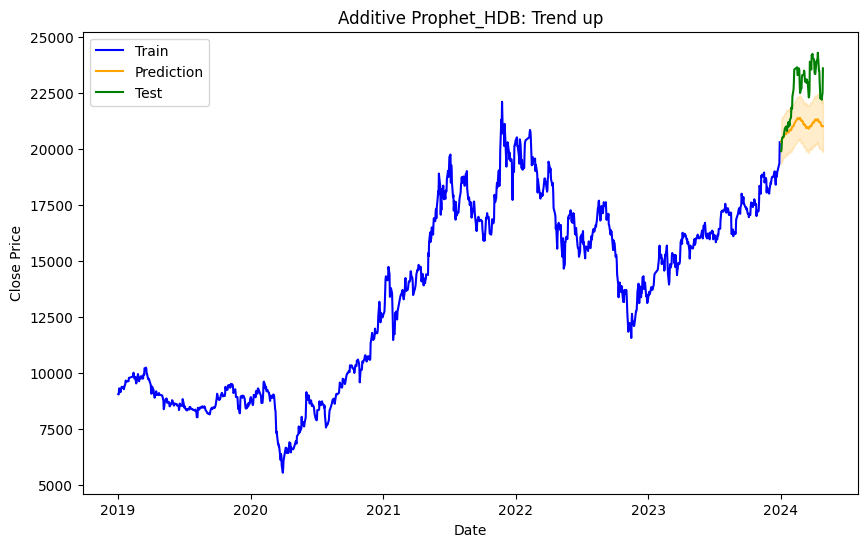

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/ewlvnp7w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/k9g5oyq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30683', 'data', 'file=/tmp/tmp5rkaockg/ewlvnp7w.json', 'init=/tmp/tmp5rkaockg/k9g5oyq9.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modellykx0kr9/prophet_model-20240803151108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): MBB


15:11:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MBB, MAE: 3432.7342301338854, RMSE: 3652.4142749853186


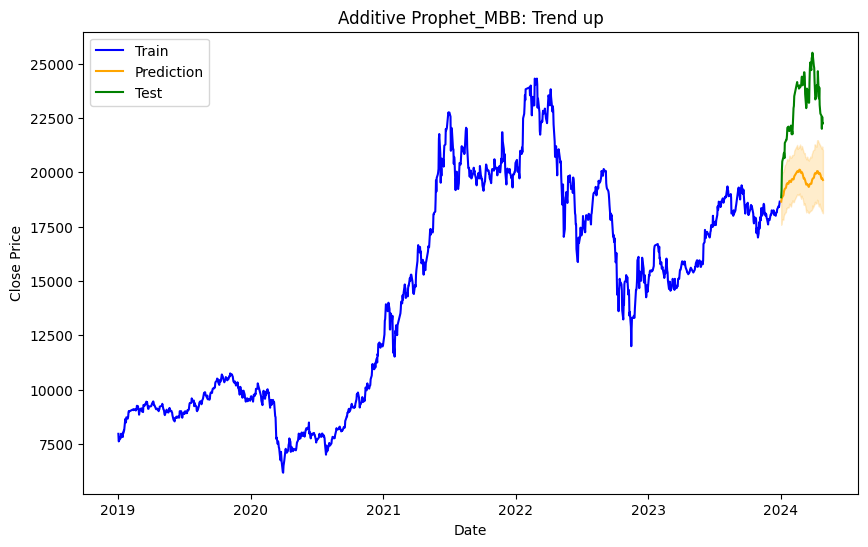

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/8my4qgbe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/j7_dkgax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55582', 'data', 'file=/tmp/tmp5rkaockg/8my4qgbe.json', 'init=/tmp/tmp5rkaockg/j7_dkgax.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model0g5j874z/prophet_model-20240803151110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): SSB


15:11:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSB, MAE: 1081.3327052387392, RMSE: 1199.9703951839235


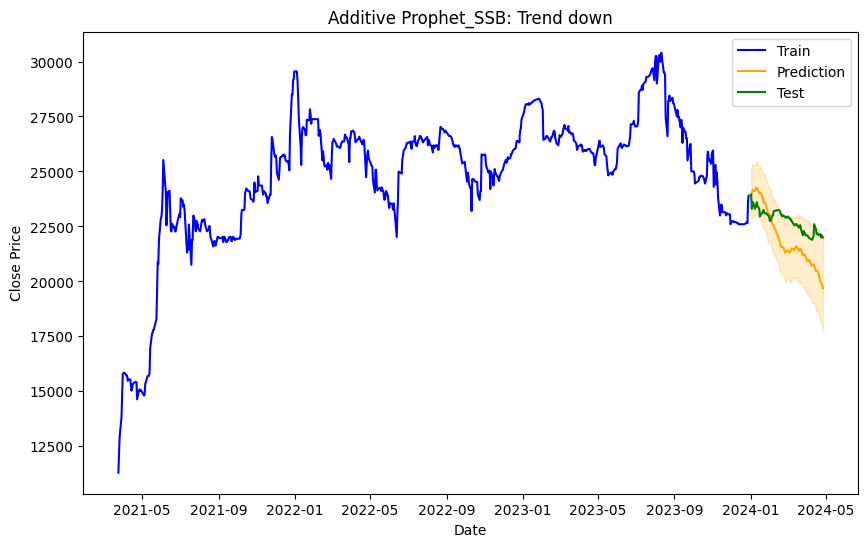

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/7y0vyo_g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/dgbi1g87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94740', 'data', 'file=/tmp/tmp5rkaockg/7y0vyo_g.json', 'init=/tmp/tmp5rkaockg/dgbi1g87.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model4p_jhfjq/prophet_model-20240803151111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): SHB


15:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SHB, MAE: 1062.7608380789322, RMSE: 1257.8696241916284


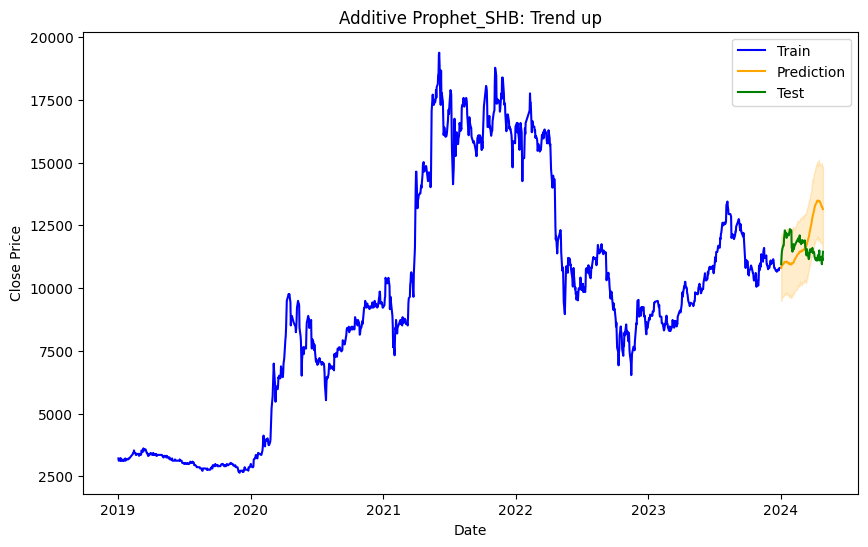

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/pattufvo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/f24veq_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12130', 'data', 'file=/tmp/tmp5rkaockg/pattufvo.json', 'init=/tmp/tmp5rkaockg/f24veq_l.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelnaq8j96l/prophet_model-20240803151112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): STB


15:11:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: STB, MAE: 938.6711728279147, RMSE: 1505.4689053839663


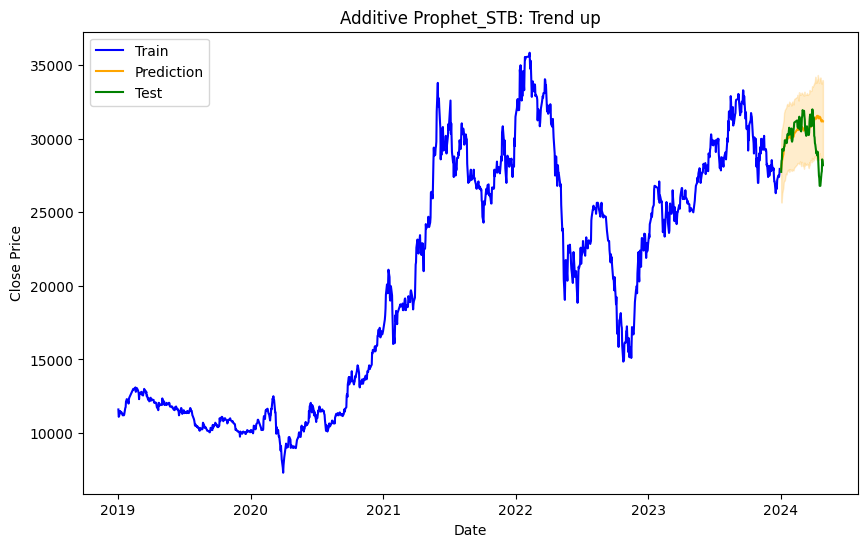

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/tncskg4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/3gcbcn8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37365', 'data', 'file=/tmp/tmp5rkaockg/tncskg4i.json', 'init=/tmp/tmp5rkaockg/3gcbcn8m.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelhbojqiwf/prophet_model-20240803151113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): TCB


15:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TCB, MAE: 6794.143081579483, RMSE: 8229.11943660348


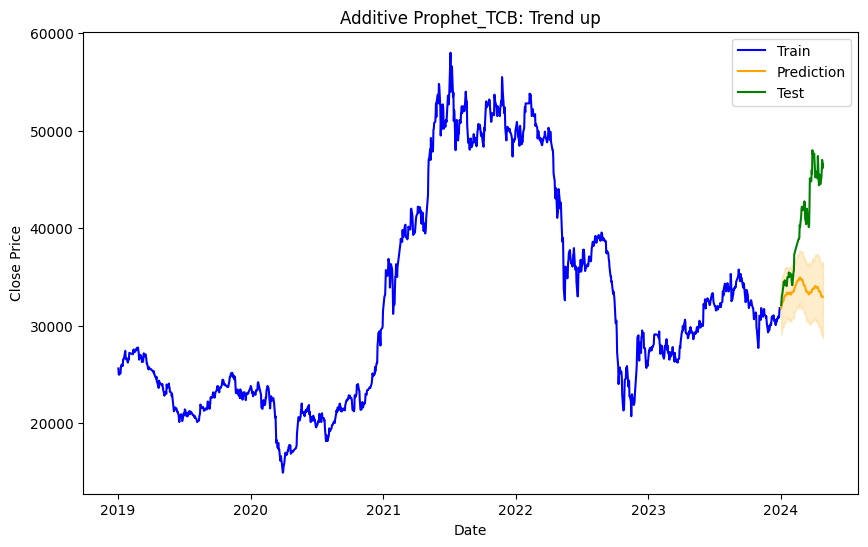

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/4gycyrc0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/l_gxplr6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17075', 'data', 'file=/tmp/tmp5rkaockg/4gycyrc0.json', 'init=/tmp/tmp5rkaockg/l_gxplr6.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelp6utl3lm/prophet_model-20240803151114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): TPB


15:11:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TPB, MAE: 629.3776424785135, RMSE: 754.8493013704747


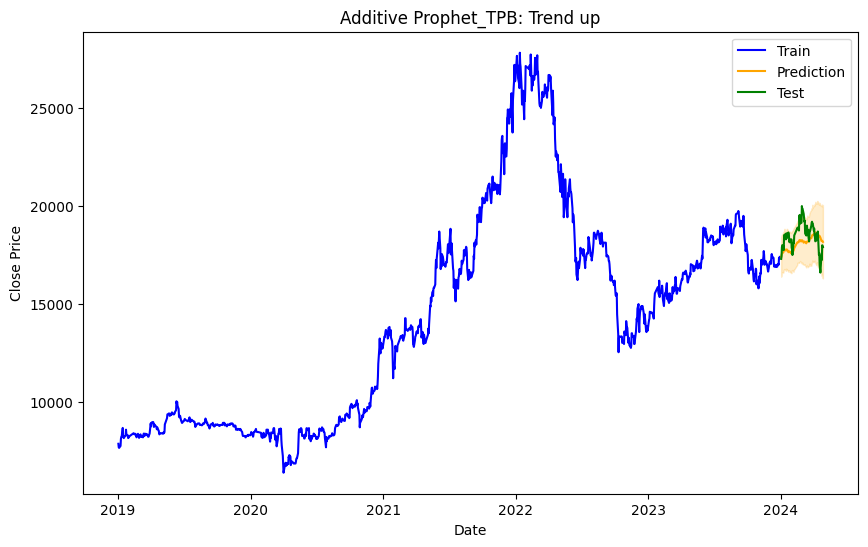

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/9arf8qdl.json


Processing ticker (Additive): VCB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/4why2255.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15098', 'data', 'file=/tmp/tmp5rkaockg/9arf8qdl.json', 'init=/tmp/tmp5rkaockg/4why2255.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model0sb5em_w/prophet_model-20240803151116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VCB, MAE: 6204.437190398592, RMSE: 6837.739111960509


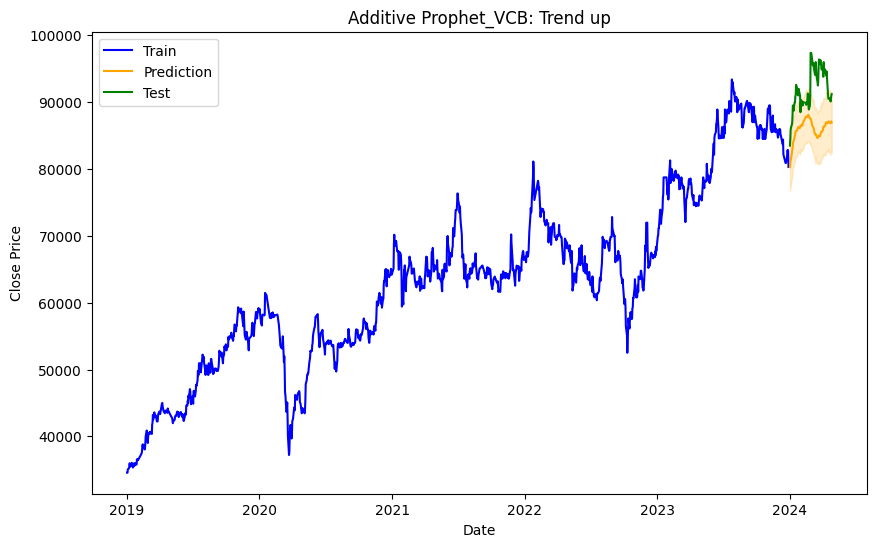

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/69lhpemn.json


Processing ticker (Additive): VIB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/13ly10qf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34066', 'data', 'file=/tmp/tmp5rkaockg/69lhpemn.json', 'init=/tmp/tmp5rkaockg/13ly10qf.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelpe3zk1x5/prophet_model-20240803151117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIB, MAE: 1902.7392377423575, RMSE: 2130.187725877982


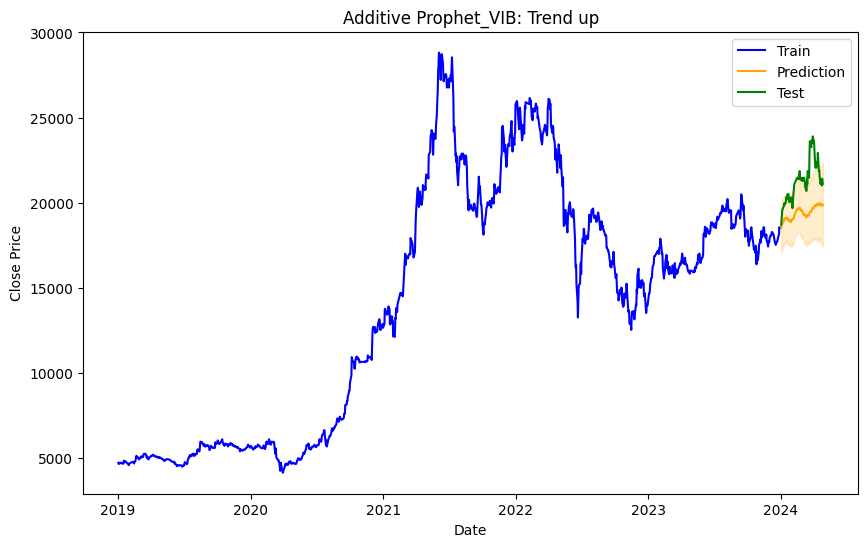

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/82ntuuph.json


Processing ticker (Additive): VPB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/rw_4u4g_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99850', 'data', 'file=/tmp/tmp5rkaockg/82ntuuph.json', 'init=/tmp/tmp5rkaockg/rw_4u4g_.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model7gpme0l6/prophet_model-20240803151119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VPB, MAE: 1110.3988996622174, RMSE: 1362.789644855731


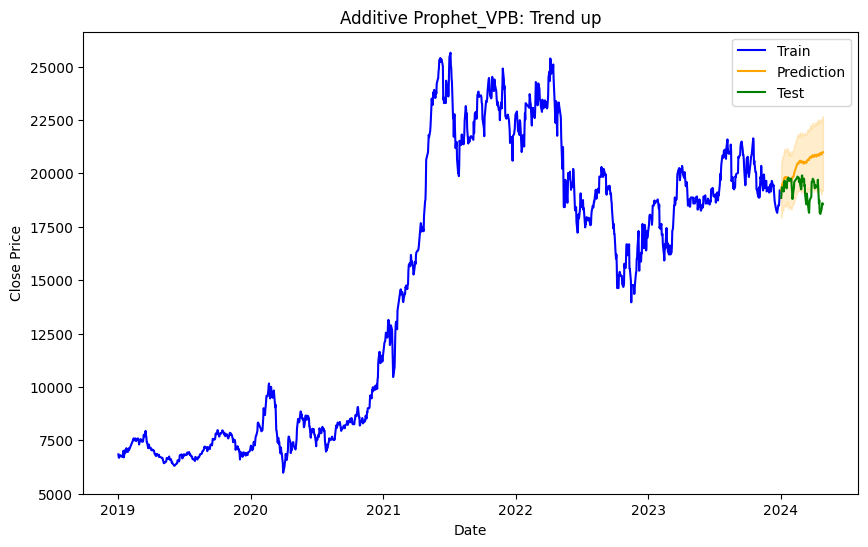

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/vqo0i_ko.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/4t85s3dr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


Processing ticker (Additive): HPG


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45961', 'data', 'file=/tmp/tmp5rkaockg/vqo0i_ko.json', 'init=/tmp/tmp5rkaockg/4t85s3dr.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelrazlbgd1/prophet_model-20240803151122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HPG, MAE: 868.0736934331351, RMSE: 1250.622121296559


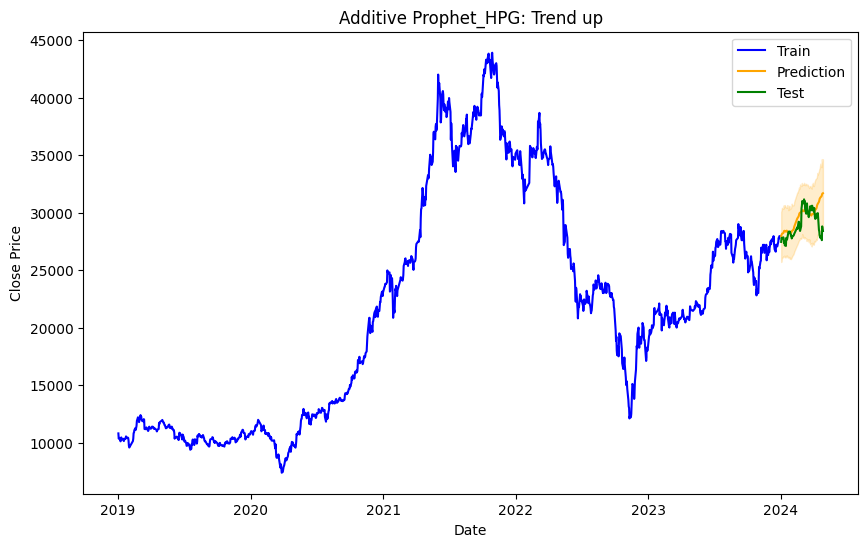

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/0hfd3tkb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/1m1agnrl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21786', 'data', 'file=/tmp/tmp5rkaockg/0hfd3tkb.json', 'init=/tmp/tmp5rkaockg/1m1agnrl.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelsogbkx_o/prophet_model-20240803151123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): GVR


15:11:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GVR, MAE: 6383.909952612662, RMSE: 7611.927828387484


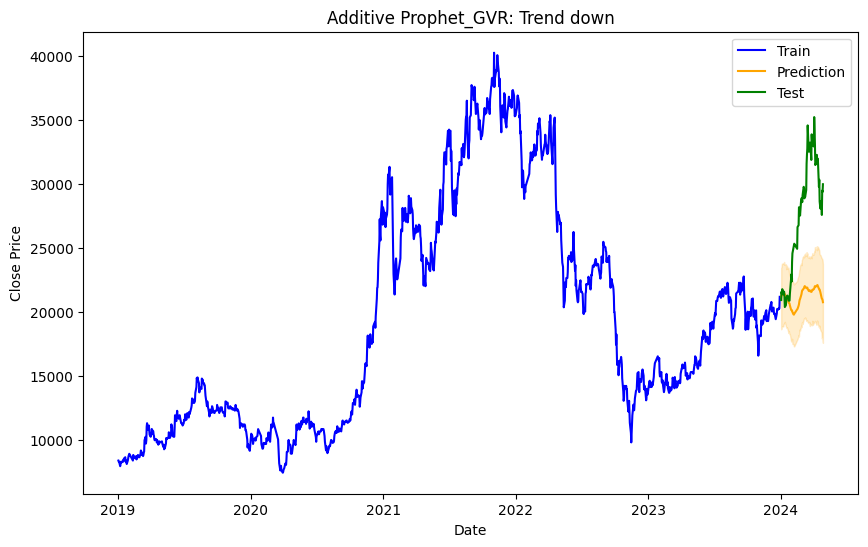

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/0lekba4b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/nfgqsvoq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71837', 'data', 'file=/tmp/tmp5rkaockg/0lekba4b.json', 'init=/tmp/tmp5rkaockg/nfgqsvoq.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelnrhju54g/prophet_model-20240803151124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): MSN


15:11:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MSN, MAE: 11264.475828240813, RMSE: 13754.373687273932


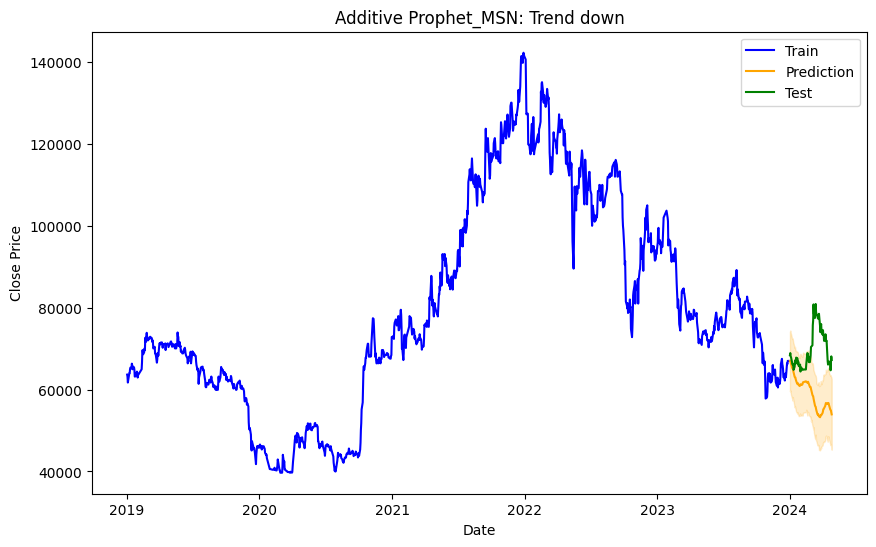

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/s_hooipm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/5e_yu4qo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89502', 'data', 'file=/tmp/tmp5rkaockg/s_hooipm.json', 'init=/tmp/tmp5rkaockg/5e_yu4qo.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model_8cjavqf/prophet_model-20240803151125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VNM


15:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VNM, MAE: 3771.542055842313, RMSE: 4458.607160223282


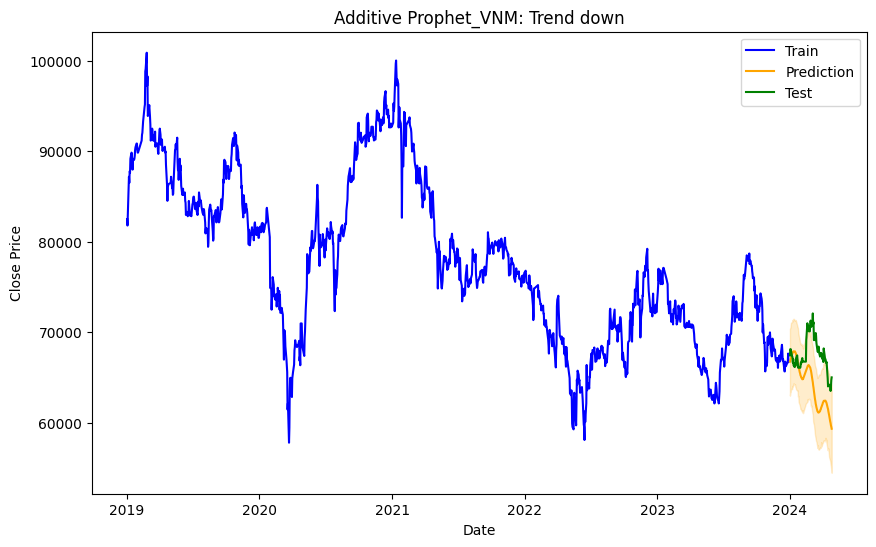

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/xlyy1qid.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/t_w9aha9.json
DEBUG:cmdstanpy:idx 0


Processing ticker (Additive): SAB


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99100', 'data', 'file=/tmp/tmp5rkaockg/xlyy1qid.json', 'init=/tmp/tmp5rkaockg/t_w9aha9.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model750xyo6q/prophet_model-20240803151126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:11:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SAB, MAE: 2992.0134992633375, RMSE: 3888.502473617373


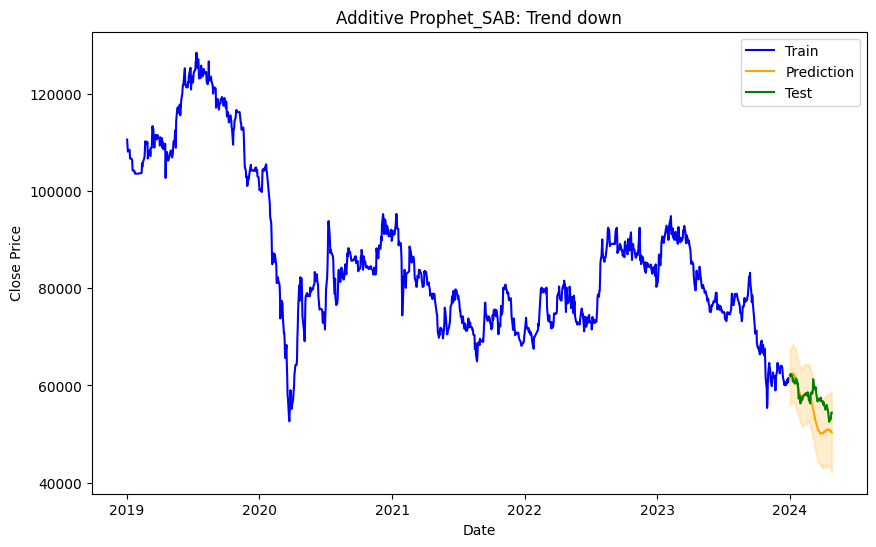

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/q19j7jd1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/omxxvvav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15651', 'data', 'file=/tmp/tmp5rkaockg/q19j7jd1.json', 'init=/tmp/tmp5rkaockg/omxxvvav.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model308youq_/prophet_model-20240803151127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VJC


15:11:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VJC, MAE: 2144.753874811967, RMSE: 2436.867418328476


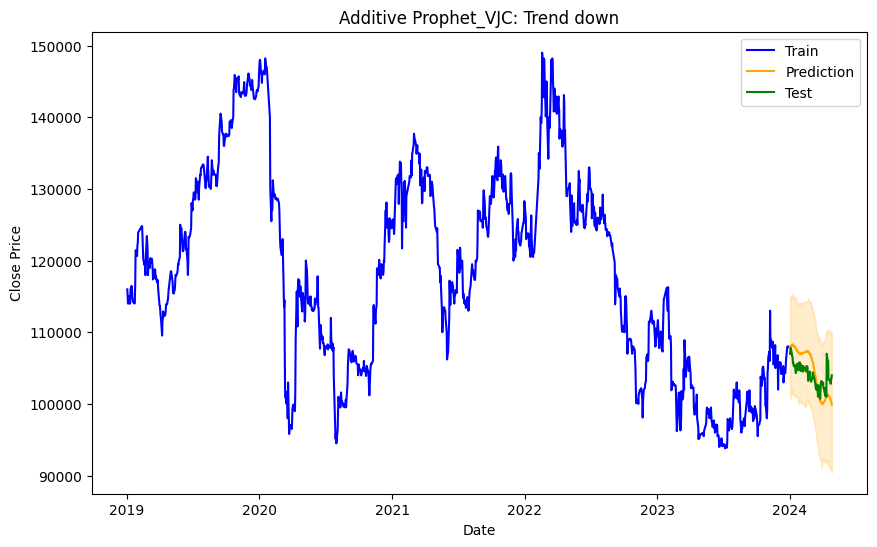

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/4txyrnwb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/gsrl13xt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33447', 'data', 'file=/tmp/tmp5rkaockg/4txyrnwb.json', 'init=/tmp/tmp5rkaockg/gsrl13xt.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelv606klb5/prophet_model-20240803151129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): MWG


15:11:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MWG, MAE: 6351.917730904011, RMSE: 7640.607328460619


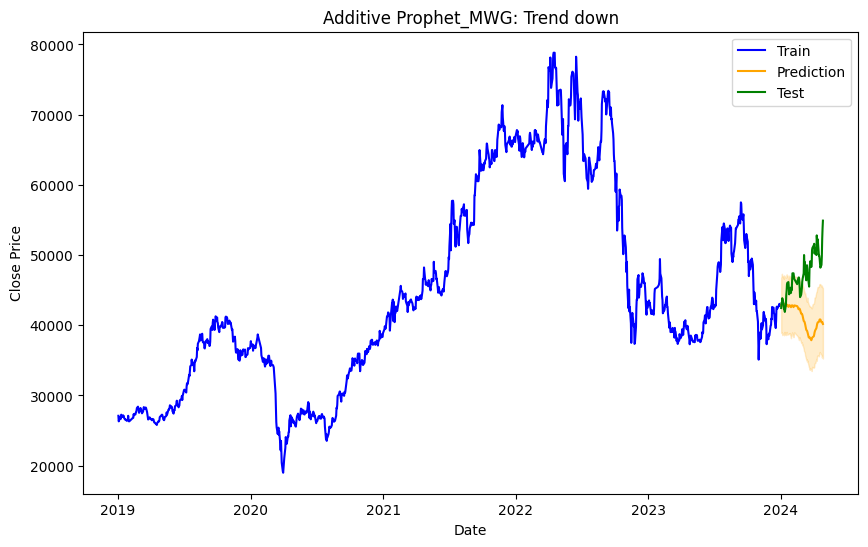

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/3z_56mav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/9rjdqs9x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30678', 'data', 'file=/tmp/tmp5rkaockg/3z_56mav.json', 'init=/tmp/tmp5rkaockg/9rjdqs9x.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model2x_gb7d5/prophet_model-20240803151130.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): PLX


15:11:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: PLX, MAE: 1247.9666888026334, RMSE: 1627.7958860849105


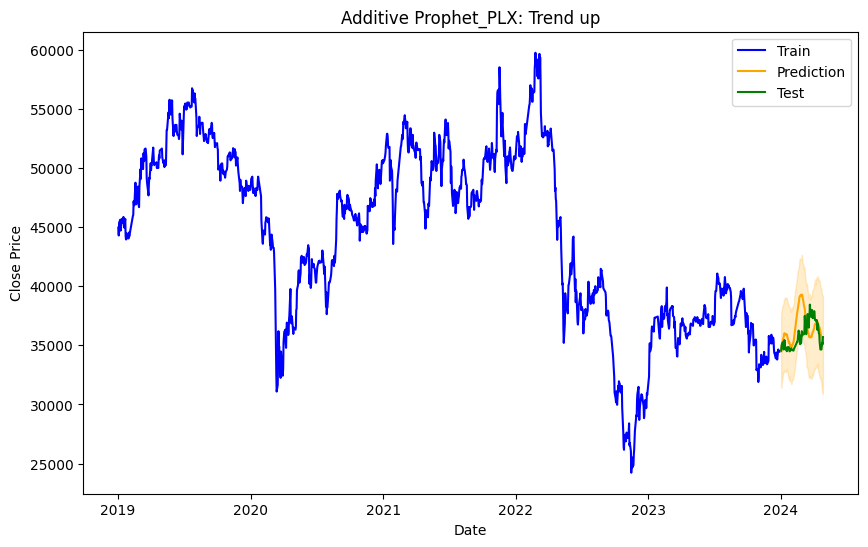

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/yqw41qiq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/7j4l_zd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92884', 'data', 'file=/tmp/tmp5rkaockg/yqw41qiq.json', 'init=/tmp/tmp5rkaockg/7j4l_zd5.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelntxw21a8/prophet_model-20240803151131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:11:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): FPT


15:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: FPT, MAE: 8359.474018499226, RMSE: 10288.790516193287


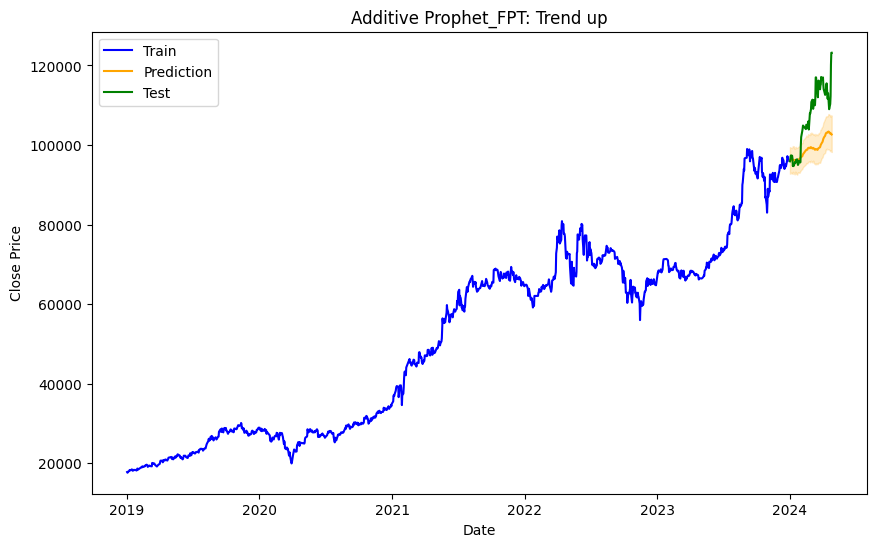

In [68]:
# Vòng lặp qua từng mã chứng khoán với additive seasonality
for ticker in tickers:
    print(f"Processing ticker (Additive): {ticker}")

    # Chuẩn bị dữ liệu cho từng mã chứng khoán
    train_df_ticker = train_df[train_df['ticker'] == ticker]
    test_df_ticker = test_df[test_df['ticker'] == ticker]

    # Đổi tên cột cho phù hợp với yêu cầu của Prophet
    train_df_ticker = train_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})
    test_df_ticker = test_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})

    # Chỉ lấy các cột cần thiết
    train_df_ticker = train_df_ticker[['ds', 'y']]
    test_df_ticker = test_df_ticker[['ds', 'y']]

    # Tạo mô hình Prophet với các thành phần mùa vụ hàng tuần và hàng năm
    model_additive = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='additive')

    # Huấn luyện mô hình và dự báo
    forecast_additive = evaluator_additive.fit_and_predict(model_additive, train_df_ticker, test_df_ticker, ticker)

    # Vẽ biểu đồ dự báo
    evaluator_additive.plot_forecast(train_df_ticker, forecast_additive, test_df_ticker, ticker, 'Additive')


## Multiplicative

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/icaj64pm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/exijtur_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59863', 'data', 'file=/tmp/tmp5rkaockg/icaj64pm.json', 'init=/tmp/tmp5rkaockg/exijtur_.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelf4n4l32e/prophet_model-20240803151332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): SSI


15:13:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSI, MAE: 4081.9759839240173, RMSE: 4482.816852671875


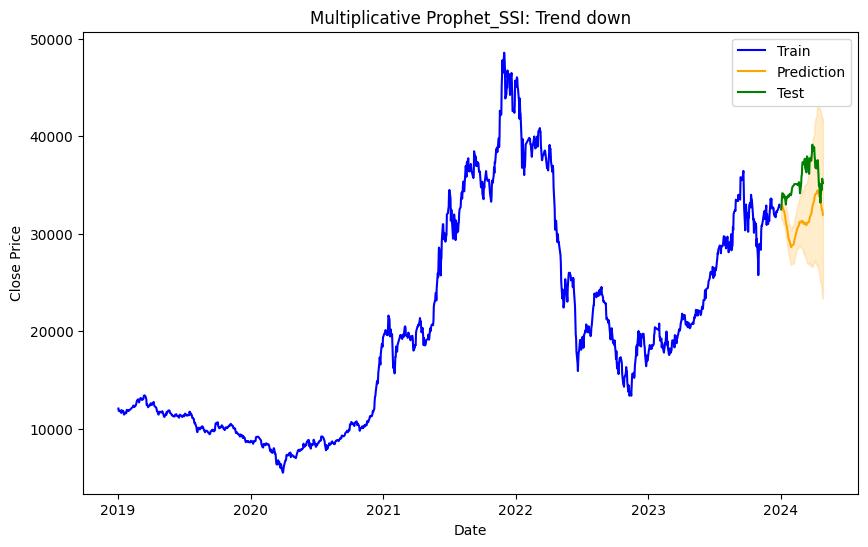

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/0aenrus0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/0tkuvpsi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54122', 'data', 'file=/tmp/tmp5rkaockg/0aenrus0.json', 'init=/tmp/tmp5rkaockg/0tkuvpsi.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model18bczs5o/prophet_model-20240803151335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): BCM


15:13:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BCM, MAE: 3715.256406933202, RMSE: 4399.697524924807


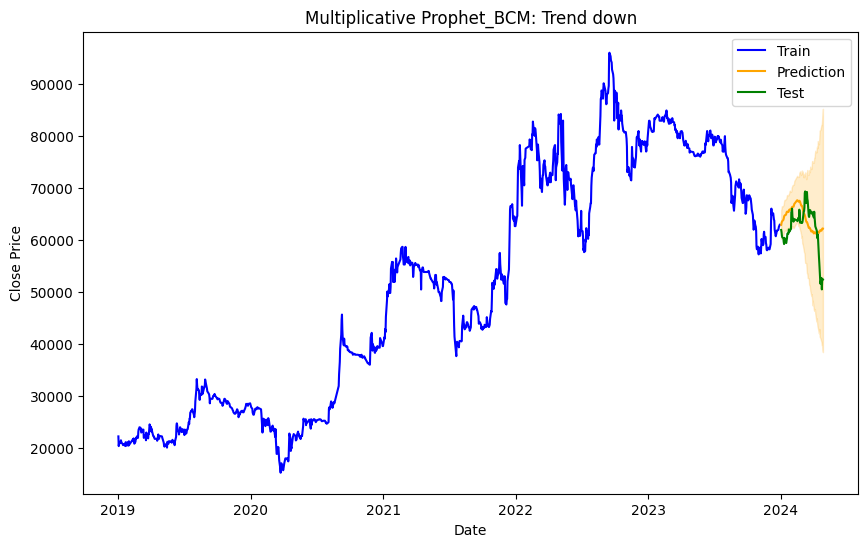

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/6xkscnfg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/fldc1gk9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78960', 'data', 'file=/tmp/tmp5rkaockg/6xkscnfg.json', 'init=/tmp/tmp5rkaockg/fldc1gk9.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelpw7outhf/prophet_model-20240803151337.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VHM


15:13:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VHM, MAE: 1509.211715754831, RMSE: 1896.6616539704883


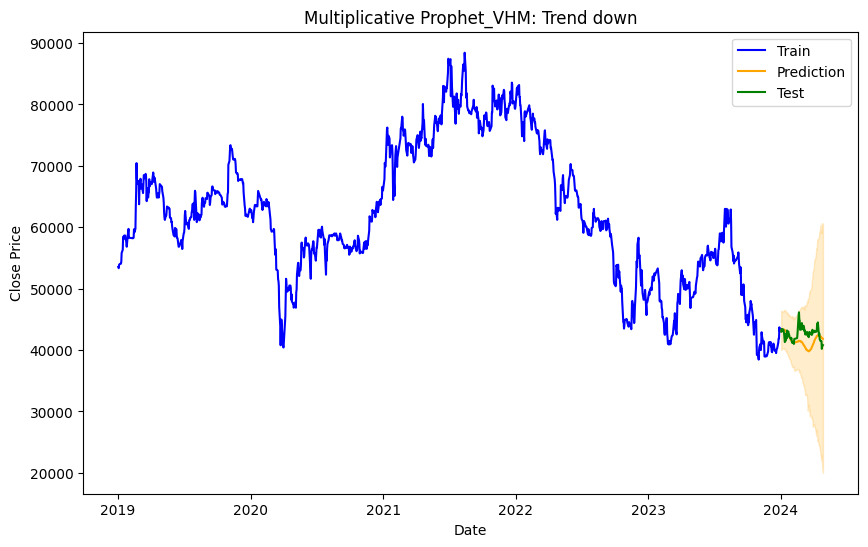

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/metntlqu.json


Processing ticker (Multiplicative): VIC


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/4qr7g8lw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21171', 'data', 'file=/tmp/tmp5rkaockg/metntlqu.json', 'init=/tmp/tmp5rkaockg/4qr7g8lw.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modellj7f64ji/prophet_model-20240803151341.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:13:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIC, MAE: 5364.877421041142, RMSE: 6616.434957519167


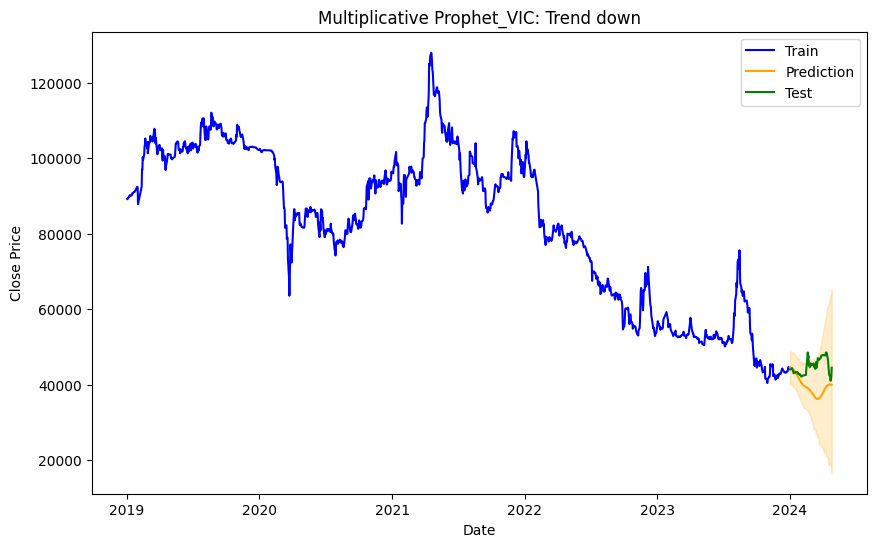

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/70js_uee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/6izzh37_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38642', 'data', 'file=/tmp/tmp5rkaockg/70js_uee.json', 'init=/tmp/tmp5rkaockg/6izzh37_.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeln5x9yf2n/prophet_model-20240803151345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VRE


15:13:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VRE, MAE: 1775.6630416421272, RMSE: 2194.0600351735443


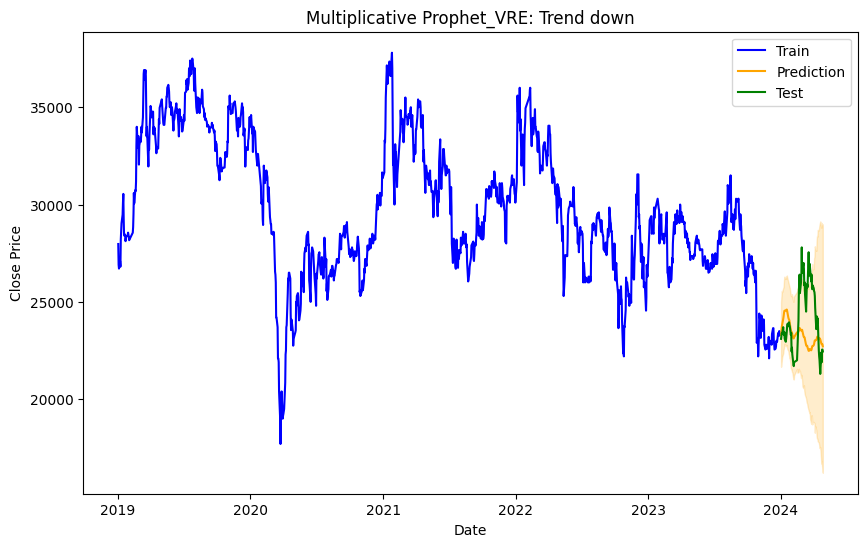

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/fpvwe52t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/gva881l9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19768', 'data', 'file=/tmp/tmp5rkaockg/fpvwe52t.json', 'init=/tmp/tmp5rkaockg/gva881l9.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelvghkbg4d/prophet_model-20240803151347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): BVH


15:13:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BVH, MAE: 3065.2015251742946, RMSE: 3692.339437576835


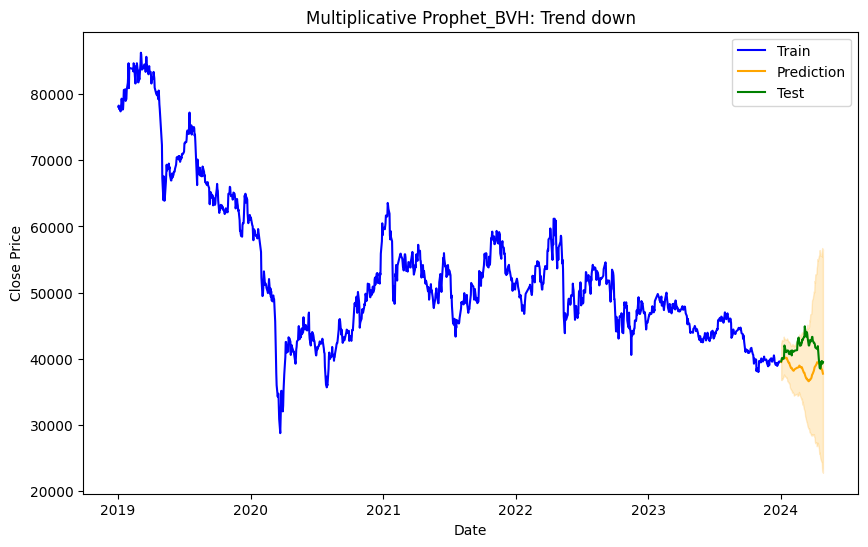

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/_sx3yj_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/rdownlt9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72700', 'data', 'file=/tmp/tmp5rkaockg/_sx3yj_8.json', 'init=/tmp/tmp5rkaockg/rdownlt9.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelqav_jvso/prophet_model-20240803151350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): POW


15:13:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: POW, MAE: 547.6976338556109, RMSE: 652.5322451138335


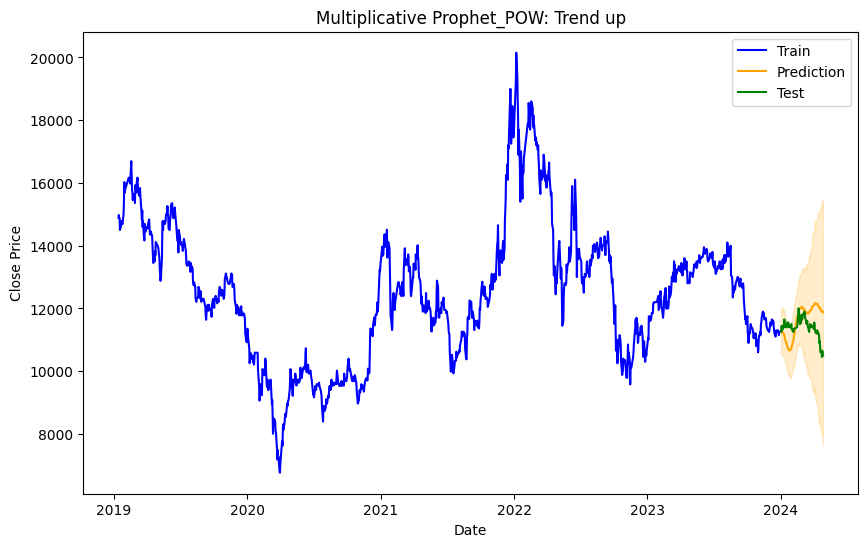

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/fc94e3sx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/b25plte8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5025', 'data', 'file=/tmp/tmp5rkaockg/fc94e3sx.json', 'init=/tmp/tmp5rkaockg/b25plte8.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelth3o6g_g/prophet_model-20240803151353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): GAS


15:13:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GAS, MAE: 4265.032250203972, RMSE: 5712.687062300069


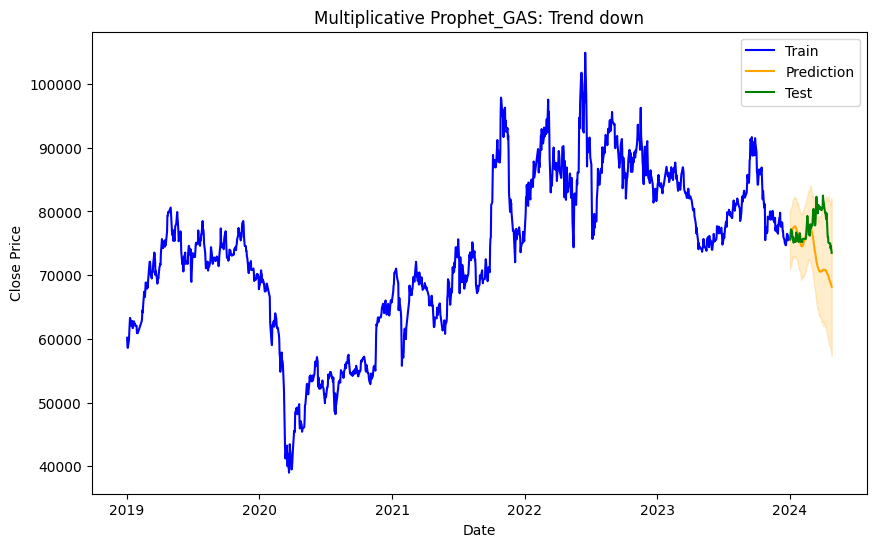

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/ax35lr0g.json


Processing ticker (Multiplicative): ACB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/qnhy9f3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80026', 'data', 'file=/tmp/tmp5rkaockg/ax35lr0g.json', 'init=/tmp/tmp5rkaockg/qnhy9f3b.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelijxd6uki/prophet_model-20240803151356.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: ACB, MAE: 1782.814684635864, RMSE: 1906.8894764517213


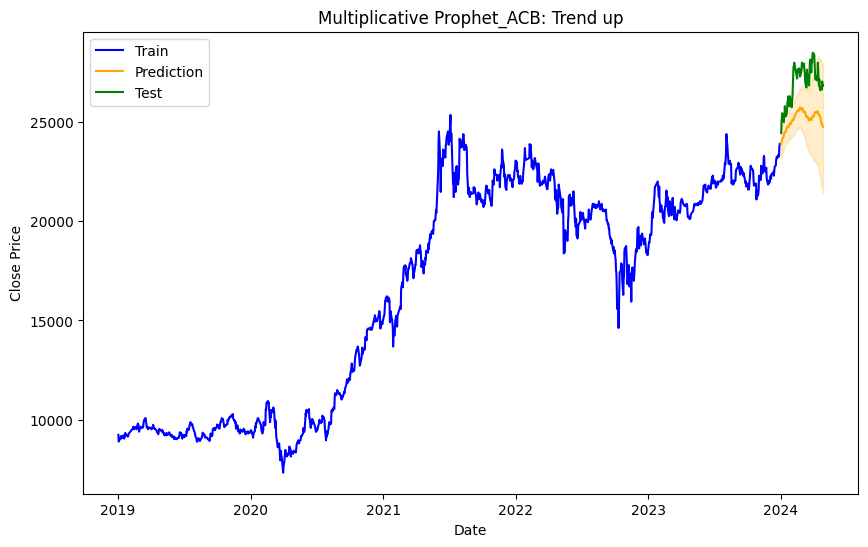

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/iu4ejc8o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/ztnlr3ig.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60079', 'data', 'file=/tmp/tmp5rkaockg/iu4ejc8o.json', 'init=/tmp/tmp5rkaockg/ztnlr3ig.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model810697vu/prophet_model-20240803151400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): BID


15:14:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BID, MAE: 3074.023861483015, RMSE: 3879.5210224907614


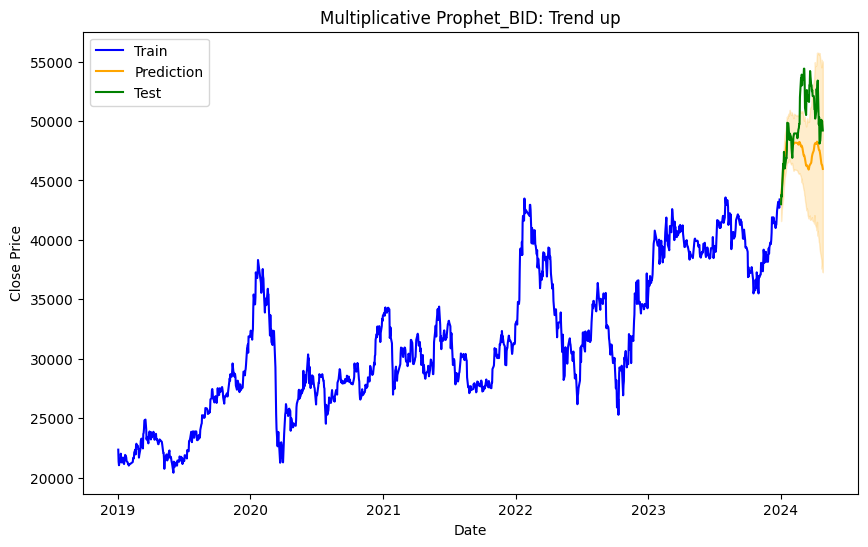

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/z_l8kzwk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/1hgczjv0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52156', 'data', 'file=/tmp/tmp5rkaockg/z_l8kzwk.json', 'init=/tmp/tmp5rkaockg/1hgczjv0.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelwdfrnwrn/prophet_model-20240803151403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): CTG


15:14:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: CTG, MAE: 5824.842860751898, RMSE: 6239.157938847959


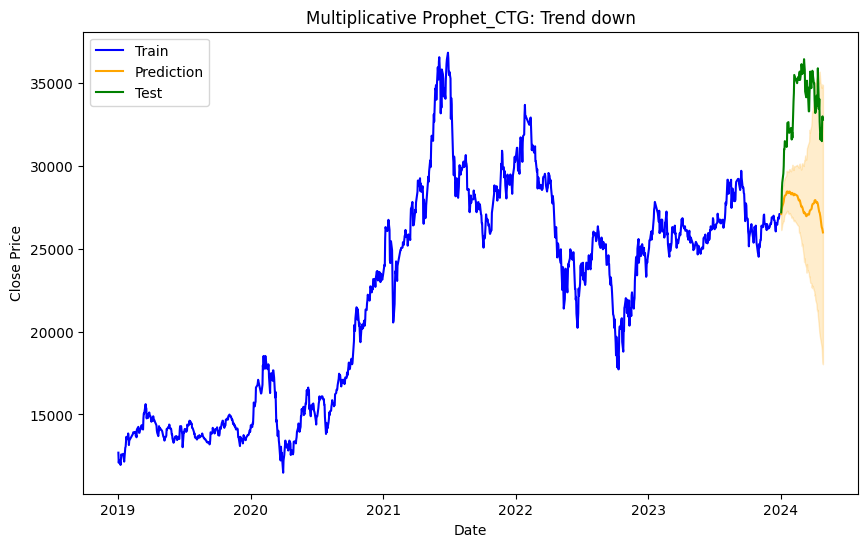

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/wekmbj96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/pohgnka7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95266', 'data', 'file=/tmp/tmp5rkaockg/wekmbj96.json', 'init=/tmp/tmp5rkaockg/pohgnka7.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeljn59y5pu/prophet_model-20240803151406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): HDB


15:14:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HDB, MAE: 1109.7106051606445, RMSE: 1319.6485118640287


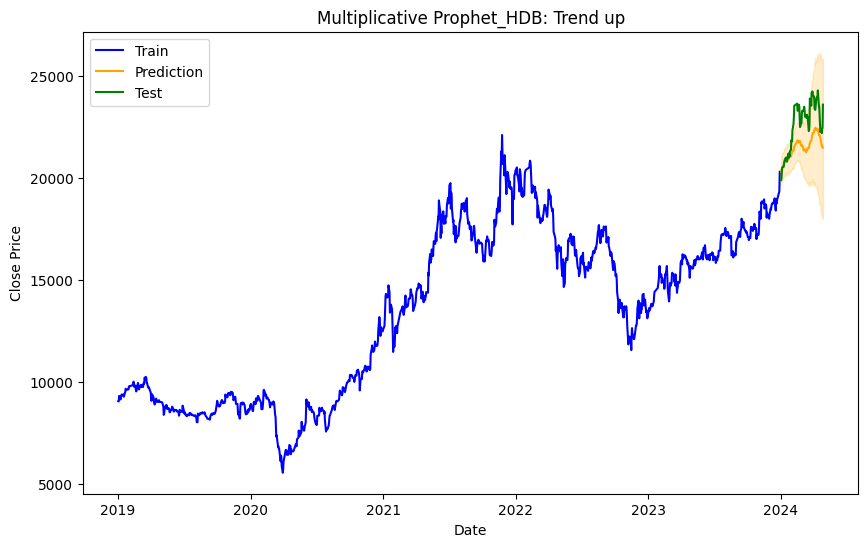

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/w7uj9hq2.json


Processing ticker (Multiplicative): MBB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/wr496nau.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21137', 'data', 'file=/tmp/tmp5rkaockg/w7uj9hq2.json', 'init=/tmp/tmp5rkaockg/wr496nau.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelm6rse_re/prophet_model-20240803151409.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MBB, MAE: 3944.281632790621, RMSE: 4276.596083319232


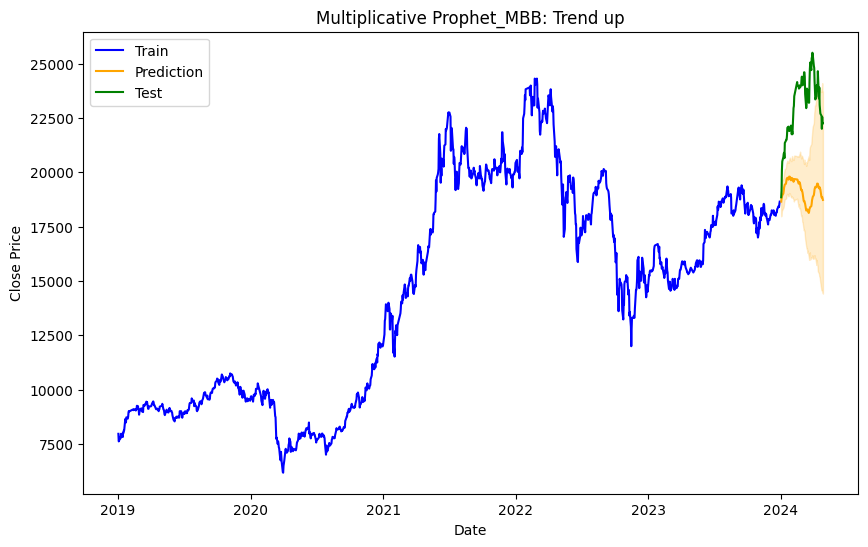

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/zjr_ecs7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/x99pu5e9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51638', 'data', 'file=/tmp/tmp5rkaockg/zjr_ecs7.json', 'init=/tmp/tmp5rkaockg/x99pu5e9.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelmu388vzt/prophet_model-20240803151414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): SSB


15:14:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSB, MAE: 1906.9456722900738, RMSE: 2186.147686520346


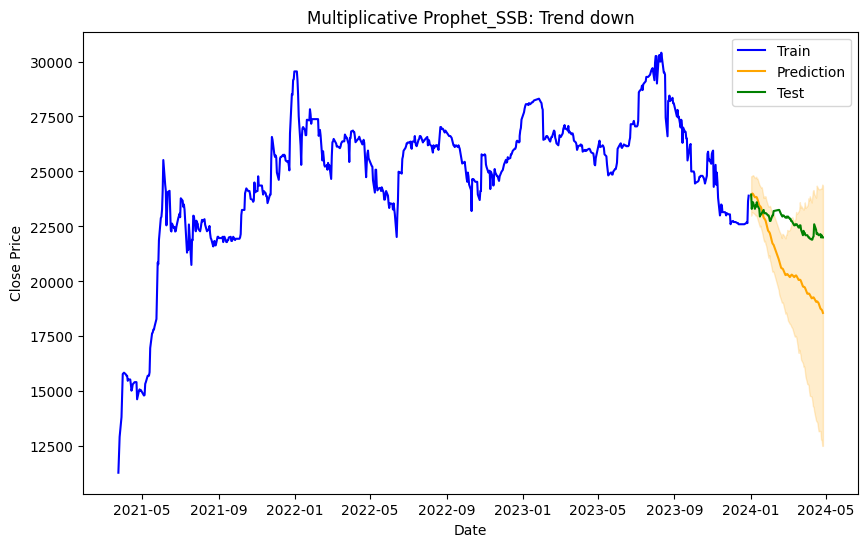

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/mmglh56a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/2jb61f93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39904', 'data', 'file=/tmp/tmp5rkaockg/mmglh56a.json', 'init=/tmp/tmp5rkaockg/2jb61f93.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model3hiv11cj/prophet_model-20240803151416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): SHB


15:14:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SHB, MAE: 1025.2315716164355, RMSE: 1126.93457297988


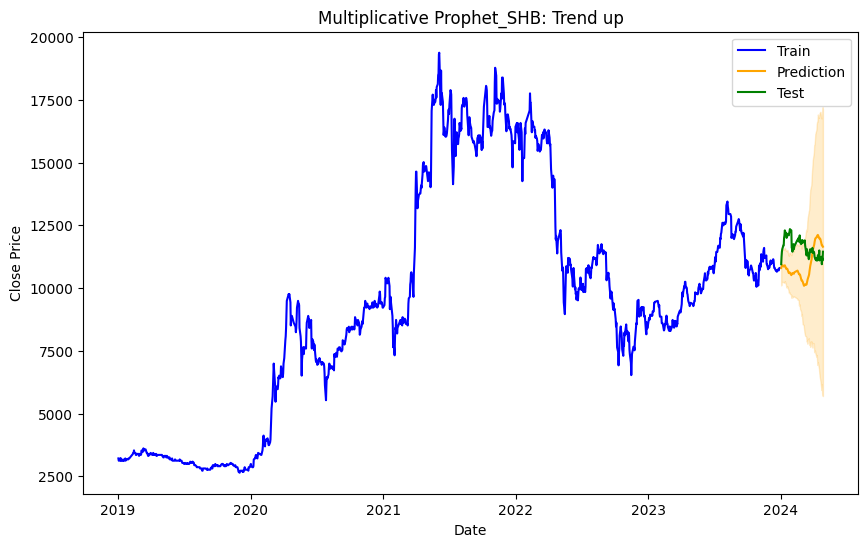

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/oqvf59ee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/ewv_bmop.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48713', 'data', 'file=/tmp/tmp5rkaockg/oqvf59ee.json', 'init=/tmp/tmp5rkaockg/ewv_bmop.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model_7n_1uuc/prophet_model-20240803151419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): STB


15:14:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: STB, MAE: 1599.4528869567187, RMSE: 1971.1614804130863


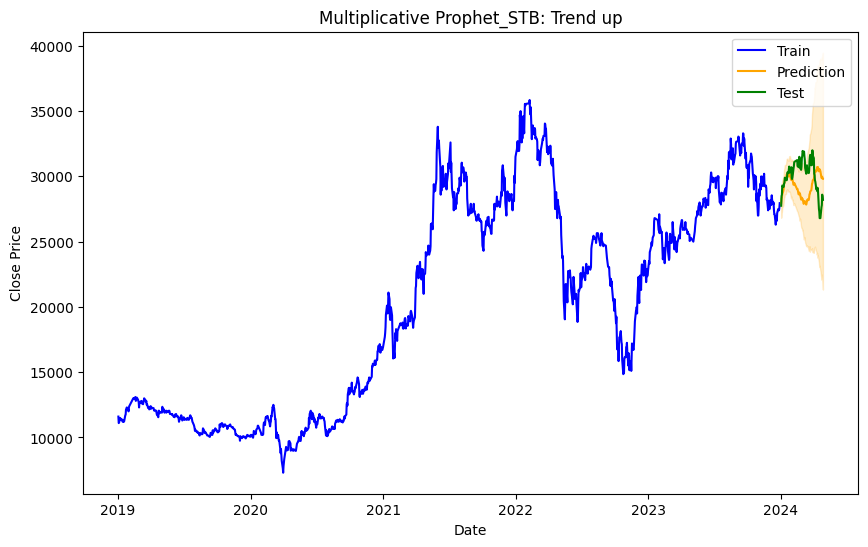

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/ct5cczhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/gtd33bll.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13029', 'data', 'file=/tmp/tmp5rkaockg/ct5cczhj.json', 'init=/tmp/tmp5rkaockg/gtd33bll.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelxksk4vyq/prophet_model-20240803151422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


Processing ticker (Multiplicative): TCB


15:14:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TCB, MAE: 8218.532718812437, RMSE: 9538.052766873468


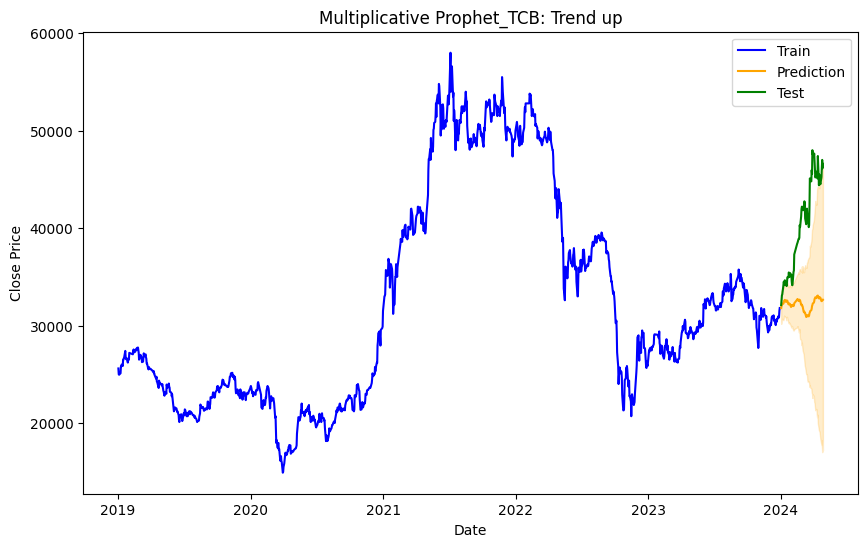

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/9e2xcyi2.json


Processing ticker (Multiplicative): TPB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/agt36sfz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3322', 'data', 'file=/tmp/tmp5rkaockg/9e2xcyi2.json', 'init=/tmp/tmp5rkaockg/agt36sfz.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model1zxpqvq7/prophet_model-20240803151426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TPB, MAE: 908.1820178907286, RMSE: 1056.1296818536684


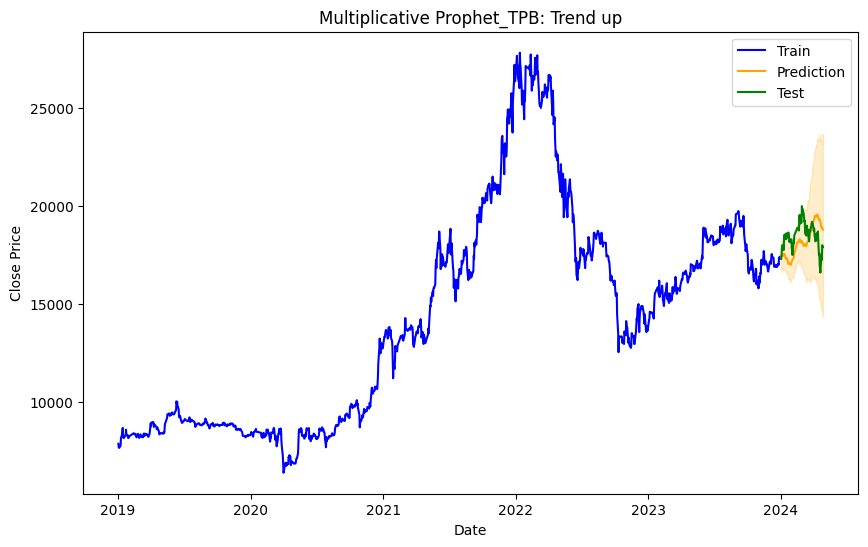

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/6vtp3yom.json


Processing ticker (Multiplicative): VCB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/ua5q8k4_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79200', 'data', 'file=/tmp/tmp5rkaockg/6vtp3yom.json', 'init=/tmp/tmp5rkaockg/ua5q8k4_.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelvl2a0aic/prophet_model-20240803151430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VCB, MAE: 6213.08360770242, RMSE: 7196.419122470025


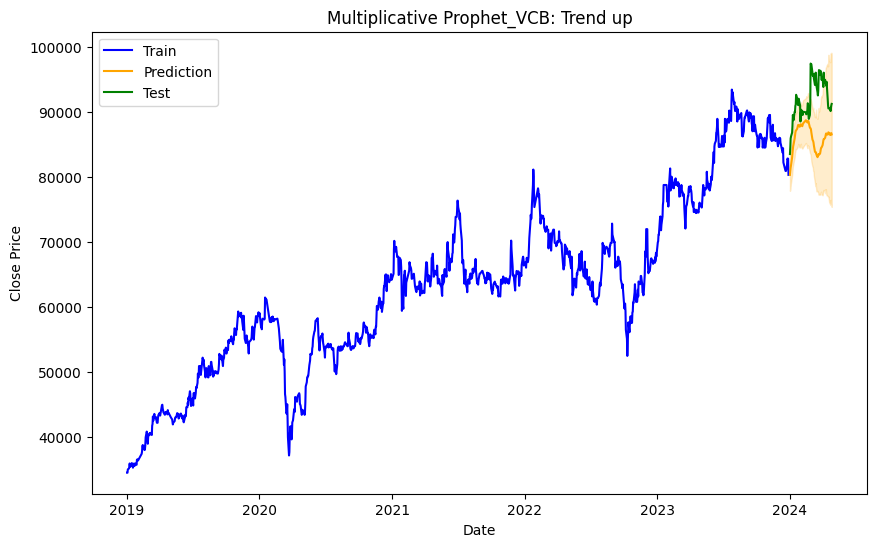

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/p2yc0fu7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/zv790_rd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33193', 'data', 'file=/tmp/tmp5rkaockg/p2yc0fu7.json', 'init=/tmp/tmp5rkaockg/zv790_rd.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelzxzjt6e2/prophet_model-20240803151433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VIB


15:14:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIB, MAE: 1775.3466822956752, RMSE: 2043.106745747272


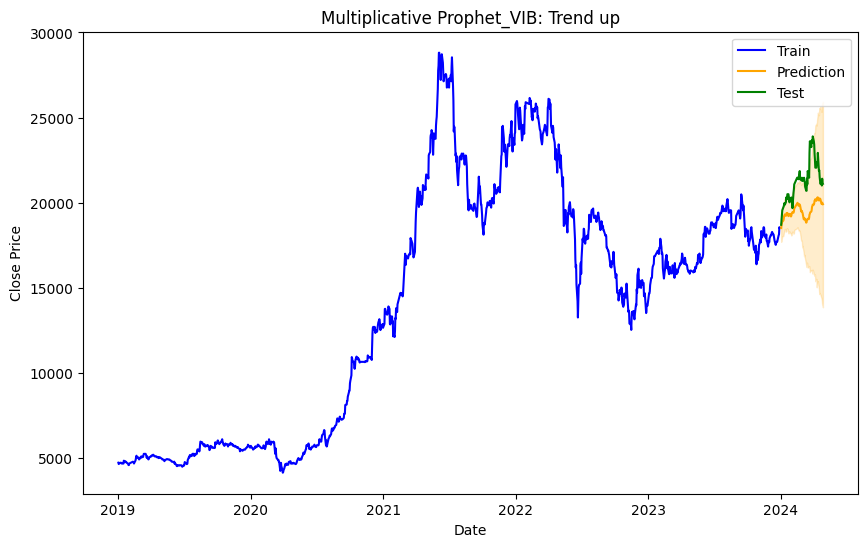

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/38ompkd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/oug08koi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19287', 'data', 'file=/tmp/tmp5rkaockg/38ompkd6.json', 'init=/tmp/tmp5rkaockg/oug08koi.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelcihv97_n/prophet_model-20240803151436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VPB


15:14:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VPB, MAE: 1103.3655371979635, RMSE: 1493.9026445940262


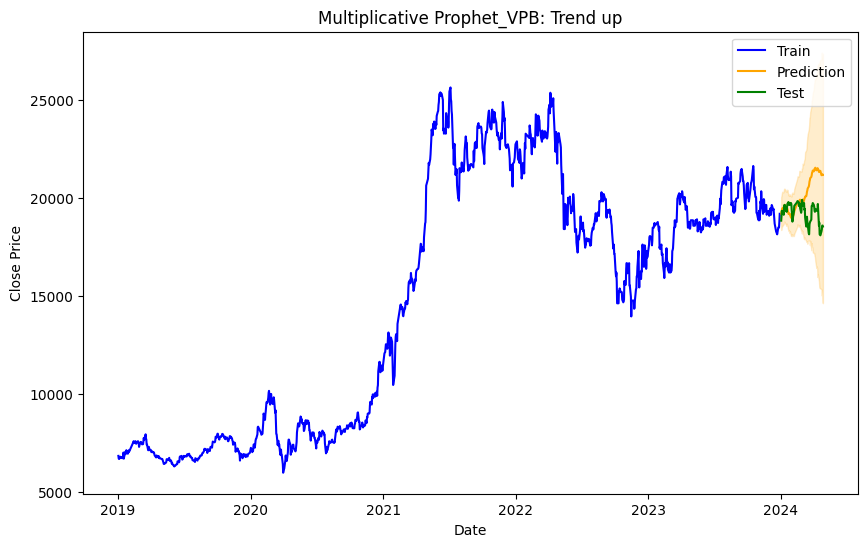

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/9k2msybb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/ds23okx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38656', 'data', 'file=/tmp/tmp5rkaockg/9k2msybb.json', 'init=/tmp/tmp5rkaockg/ds23okx3.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model66rcwht1/prophet_model-20240803151439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): HPG


15:14:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HPG, MAE: 1324.3061646367485, RMSE: 1608.9852880706394


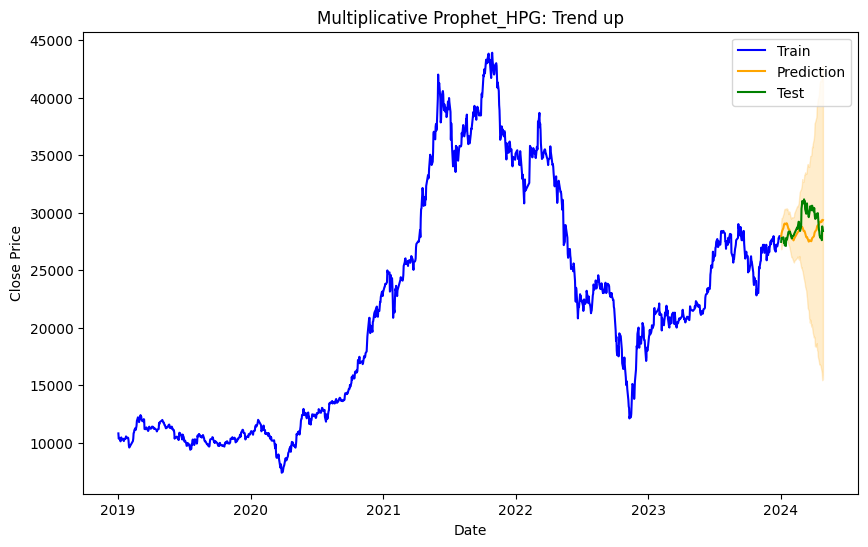

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/gigkgdtw.json


Processing ticker (Multiplicative): GVR


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/0v1wtj8z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16133', 'data', 'file=/tmp/tmp5rkaockg/gigkgdtw.json', 'init=/tmp/tmp5rkaockg/0v1wtj8z.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelsge9tmcw/prophet_model-20240803151443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GVR, MAE: 7335.5800793828275, RMSE: 8513.124614334216


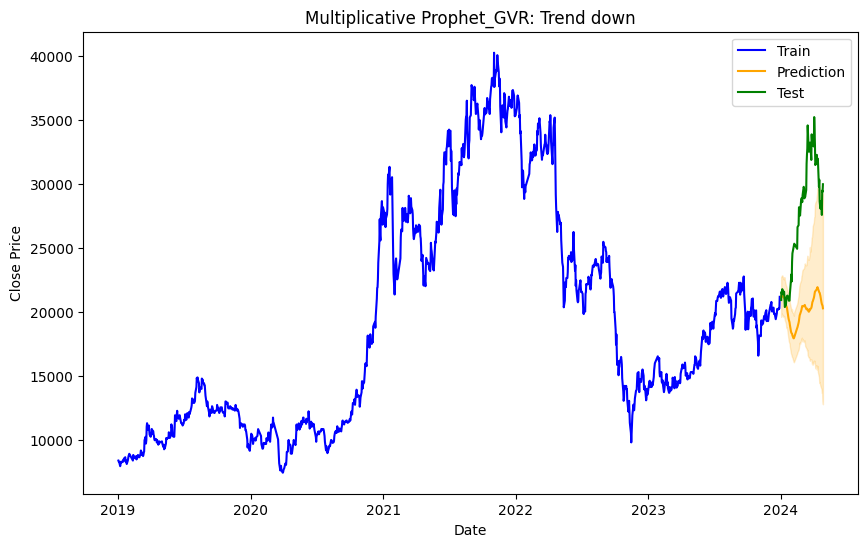

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/fyo0nylv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/bu0m8iji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89471', 'data', 'file=/tmp/tmp5rkaockg/fyo0nylv.json', 'init=/tmp/tmp5rkaockg/bu0m8iji.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model8i2s_fuw/prophet_model-20240803151447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): MSN


15:14:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MSN, MAE: 14124.14660355107, RMSE: 16737.980637989727


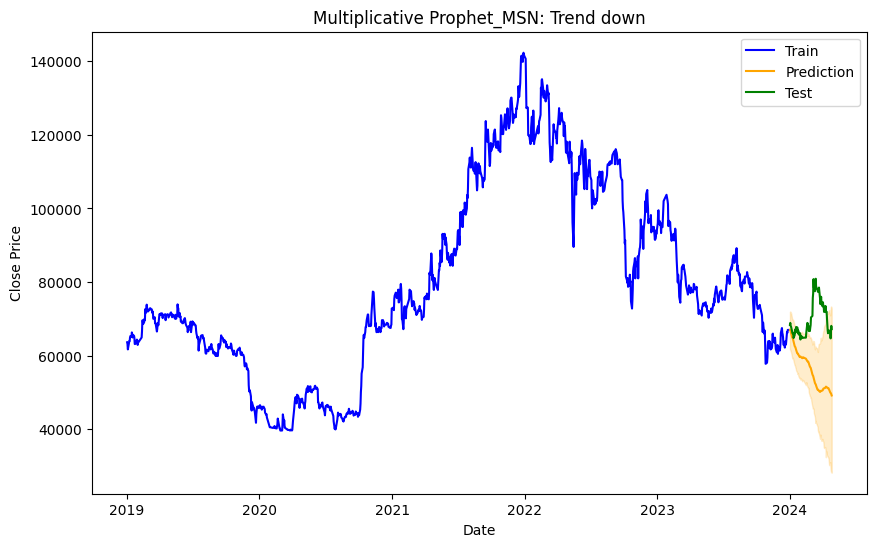

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/pf9d1x98.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/h5k_ov9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46032', 'data', 'file=/tmp/tmp5rkaockg/pf9d1x98.json', 'init=/tmp/tmp5rkaockg/h5k_ov9t.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelscq2uzwp/prophet_model-20240803151450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VNM


15:14:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VNM, MAE: 4702.998744374605, RMSE: 5547.661506359563


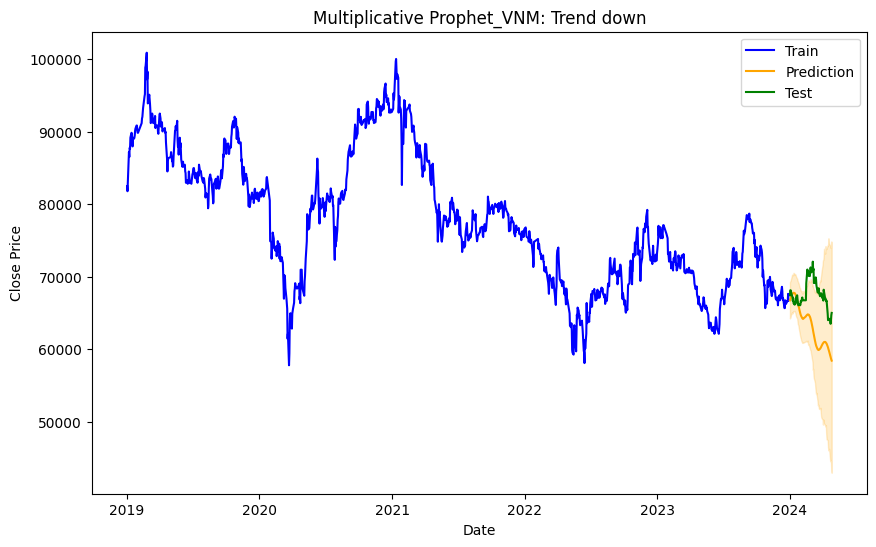

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/m9vmtwvo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/guoiknwc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94478', 'data', 'file=/tmp/tmp5rkaockg/m9vmtwvo.json', 'init=/tmp/tmp5rkaockg/guoiknwc.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modellkadx3uu/prophet_model-20240803151453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): SAB


15:14:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SAB, MAE: 2184.516907192356, RMSE: 2769.060427626678


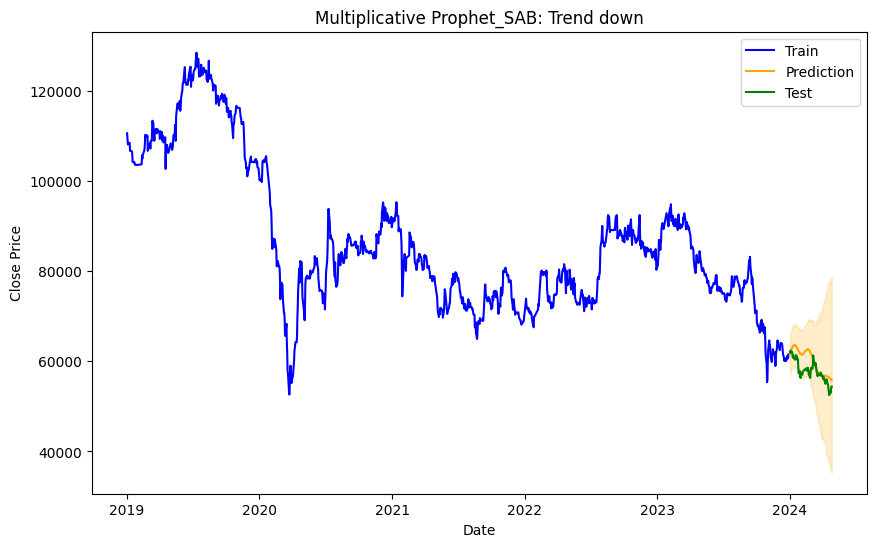

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/5hpv24kg.json


Processing ticker (Multiplicative): VJC


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/_mu3vj6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20428', 'data', 'file=/tmp/tmp5rkaockg/5hpv24kg.json', 'init=/tmp/tmp5rkaockg/_mu3vj6z.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeli6_efdgg/prophet_model-20240803151457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:15:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VJC, MAE: 3342.2700727085153, RMSE: 4027.083387401119


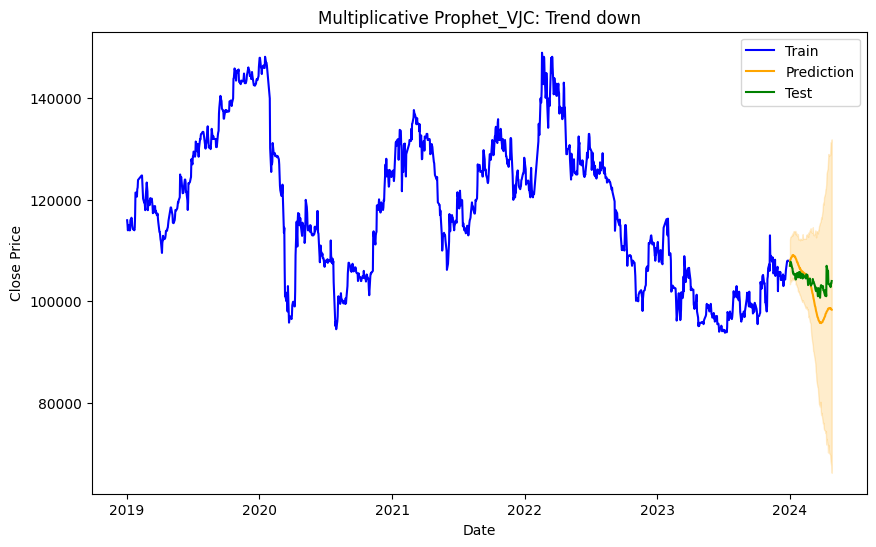

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/g34swlxl.json


Processing ticker (Multiplicative): MWG


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/5q64tbyh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69597', 'data', 'file=/tmp/tmp5rkaockg/g34swlxl.json', 'init=/tmp/tmp5rkaockg/5q64tbyh.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model7rgwnyyd/prophet_model-20240803151502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:15:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:15:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MWG, MAE: 6892.718713129378, RMSE: 8019.757283744389


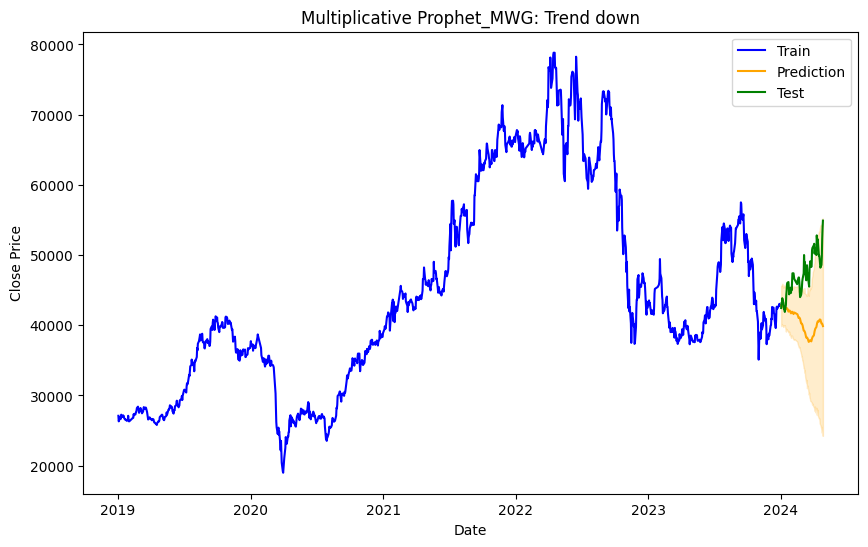

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/rci64b7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/0qvjm4_n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5297', 'data', 'file=/tmp/tmp5rkaockg/rci64b7q.json', 'init=/tmp/tmp5rkaockg/0qvjm4_n.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model9sd8vnzh/prophet_model-20240803151507.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:15:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): PLX


15:15:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: PLX, MAE: 1415.7192930803237, RMSE: 1699.59640403365


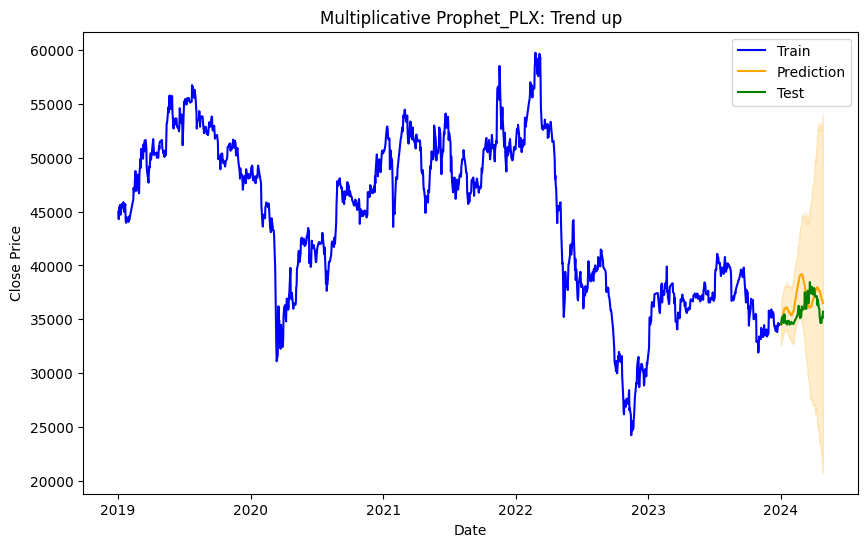

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/otmezjte.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/0m8k4awn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88397', 'data', 'file=/tmp/tmp5rkaockg/otmezjte.json', 'init=/tmp/tmp5rkaockg/0m8k4awn.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model3aonef5u/prophet_model-20240803151510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:15:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): FPT


15:15:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: FPT, MAE: 12505.94511980189, RMSE: 15363.962323883527


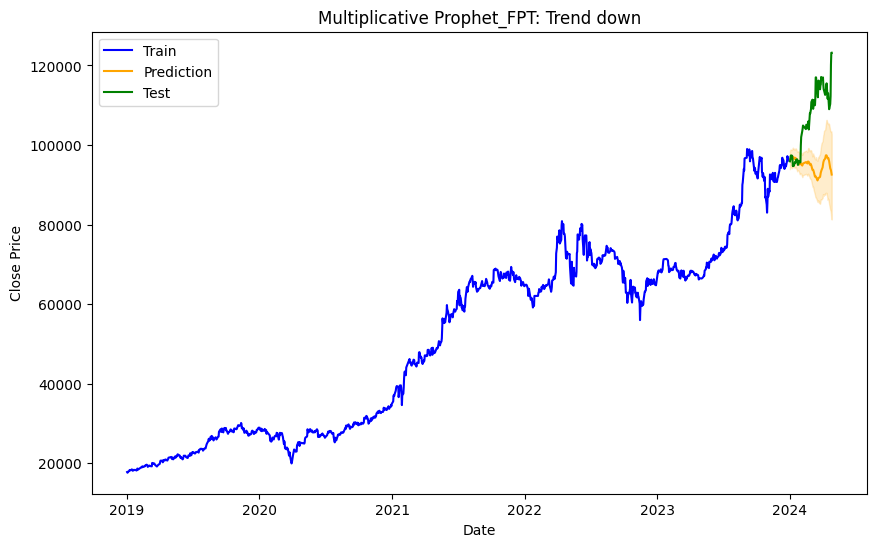

In [70]:

# Vòng lặp qua từng mã chứng khoán với multiplicative seasonality
for ticker in tickers:
    print(f"Processing ticker (Multiplicative): {ticker}")

    # Chuẩn bị dữ liệu cho từng mã chứng khoán
    train_df_ticker = train_df[train_df['ticker'] == ticker]
    test_df_ticker = test_df[test_df['ticker'] == ticker]

    # Đổi tên cột cho phù hợp với yêu cầu của Prophet
    train_df_ticker = train_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})
    test_df_ticker = test_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})

    # Chỉ lấy các cột cần thiết
    train_df_ticker = train_df_ticker[['ds', 'y']]
    test_df_ticker = test_df_ticker[['ds', 'y']]

    # Tạo mô hình Prophet với các thành phần mùa vụ hàng tuần và hàng năm
    model_multiplicative = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='multiplicative')

    # Huấn luyện mô hình và dự báo
    forecast_multiplicative = evaluator_multiplicative.fit_and_predict(model_multiplicative, train_df_ticker, test_df_ticker, ticker)

    # Vẽ biểu đồ dự báo
    evaluator_multiplicative.plot_forecast(train_df_ticker, forecast_multiplicative, test_df_ticker, ticker, 'Multiplicative')


In [57]:
# # Lấy và hiển thị kết quả
# results_df_additive = evaluator_additive.get_results()
# results_df_multiplicative = evaluator_multiplicative.get_results()
# print("Additive Results:")
# print(results_df_additive)
# print("Multiplicative Results:")
# print(results_df_multiplicative)

In [71]:
# Lấy và hiển thị kết quả
results_df_additive, avg_mae_additive, avg_rmse_additive = evaluator_additive.get_results('additive')
results_df_multiplicative, avg_mae_multiplicative, avg_rmse_multiplicative = evaluator_multiplicative.get_results('multiplicative')

print("Additive Results:")
print(results_df_additive)
print(f'Average MAE (Additive): {avg_mae_additive}, Average RMSE (Additive): {avg_rmse_additive}')

print("Multiplicative Results:")
print(results_df_multiplicative)
print(f'Average MAE (Multiplicative): {avg_mae_multiplicative}, Average RMSE (Multiplicative): {avg_rmse_multiplicative}')






Average MAE (Additive): 3358.7041718832093, Average RMSE (Additive): 4003.0081672903807
Average MAE (Multiplicative): 3887.9644005323803, Average RMSE (Multiplicative): 4605.603645903987
Additive Results:
   ticker           mae          rmse seasonality_mode
0     SSI   1531.845126   1783.622404         additive
1     BCM   3813.817486   4323.646052         additive
2     VHM   1301.490936   1651.365161         additive
3     VIC   3834.416732   4917.436417         additive
4     VRE   1686.073083   1976.674154         additive
5     BVH   3427.811291   3956.365841         additive
6     POW    189.978760    244.239268         additive
7     GAS   4600.381570   6024.802086         additive
8     ACB   2142.070144   2259.260095         additive
9     BID   4879.126247   5675.993039         additive
10    CTG   5226.090120   5538.126896         additive
11    HDB   1587.301322   1850.210765         additive
12    MBB   3432.734230   3652.414275         additive
13    SSB   1081.332705  